# Review
Every time, when we talk to each other it is clear that we will understand each other, right?  
So what do you say about the fact that there are 430 million people in the world who speak, but those closest to them do not understand them.  
Over 5% of the world's population are deaf people. These people are unable to speak the mother tongue of their country. But, they have one language common to all deaf people - the sign language.  
Fingerspelling uses hand shapes that represent individual letters to convey words. While fingerspelling is only a part of the whole sign language, it is often used for communicating names, addresses, phone numbers, and other information commonly entered on a mobile phone. Many Deaf smartphone users can fingerspell words faster than they can type on mobile keyboards. In fact, ASL fingerspelling can be substantially faster than typing on a smartphone's virtual keyboard (57 words/minute average versus 36 words/minute US average).  
Our goal is to help the deaf community and its disabilities by translating sign language into English sentences.  
We hope to help provide Deaf and Hard of Hearing users the option to fingerspell words instead of using a keyboard, and to enable the Deaf and Hard of Hearing community to communicate with hearing non-signers more quickly and smoothly.  
  
In this project we will detect and translate American Sign Language fingerspelling into text. We will create a model trained on a dataset That includes more than three million fingerspelled characters produced by over 100 Deaf signers captured via the selfie camera of a smartphone with a variety of backgrounds and lighting conditions.  
 
Our data was taken from the huge database brought in by the [Google competition](https://www.kaggle.com/competitions/asl-fingerspelling) on the Kegel website

Let's dive into our data, explore it and see how to use this uge dataset for our purpose in the best possible way.


# Import the data


Google has provided a huge amount of data. When it's divided into two categories: supplemental_metadata and train_data, so that supplemental contains spoken English sentences, compared to train_data which contains addresses / phone numbers / website addresses, etc.  
Since the amount of information is huge, we decided in order to reach results efficiently, to focus on the train_data database, where we felt, there is more of a challenge, since it does not consist only of the letters of the English language but of signs and numbers as well.
We will also take a small look at the database that we will not use in this project, in order to understand what it is about.

In [1]:
import pandas as pd
train_df = pd.read_csv('/kaggle/input/asl-fingerspelling/train.csv')
train_df.head()

,path,file_id,sequence_id,participant_id,phrase
0,train_landmarks/5414471.parquet,5414471,1816796431,217,3 creekhouse
1,train_landmarks/5414471.parquet,5414471,1816825349,107,scales/kuhaylah
2,train_landmarks/5414471.parquet,5414471,1816909464,1,1383 william lanier
3,train_landmarks/5414471.parquet,5414471,1816967051,63,988 franklin lane
4,train_landmarks/5414471.parquet,5414471,1817123330,89,6920 northeast 661st road


In [5]:
print("The full train shape is: ")
train_df.shape

The full train shape is: 


(67208, 5)

Under this database, there is another database called supplemental. Let's take a look and see what it consists of:

In [1]:
import pandas as pd
supplemental = pd.read_csv('/kaggle/input/asl-fingerspelling/supplemental_metadata.csv')
supplemental.head()

,path,file_id,sequence_id,participant_id,phrase
0,supplemental_landmarks/33432165.parquet,33432165,1535467051,251,coming up with killer sound bites
1,supplemental_landmarks/33432165.parquet,33432165,1535499058,239,we better investigate this
2,supplemental_landmarks/33432165.parquet,33432165,1535530550,245,interesting observation was made
3,supplemental_landmarks/33432165.parquet,33432165,1535545499,38,victims deserve more redress
4,supplemental_landmarks/33432165.parquet,33432165,1535585216,254,knee bone is connected to the thigh bone


In [7]:
print("The full supplemental shape is: ")
supplemental.shape

The full supplemental shape is: 


(52958, 5)

You can see that in general the database is the same, and also contains a huge amount of information. The difference between this and the train dataset is in the nature of the texts in the phrase column. In the train database, the sentences are general, meaning they contain numbers / signs / letters. On the other hand, in the supplemental database, the sentences consist only of letters, and they represent sentences in the English language, everyday speech sentences.  
Additionally, it can be noticed that this database is smaller than the train database:  
The supplemental database is smaller by 14,250 video samples than the train database.

The train data frame contains 67208 rows, and 5 columns:
each entry in the train data frame is a separate sequence - phrase
* path - The path to the landmark file
* file_id - A unique identifier for the data file.
* sequence_id - A unique identifier for the landmark sequence. Each data file may contain many sequences.
* participant_id - A unique identifier for the data contributor.
* phrase - The labels for the landmark sequence: randomly generated addresses, phone numbers, and urls.

# Data Explore
### General
Let's explain what our database looks like:  
Google has collected videos of deaf people filming themselves speaking in English sign language.  
The goal of our project is to translate English letters according to a fingerspelling image.  
The videos were converted by the Mediapipe library to Perquiat files.  
  
Each video is divided into segments - sequences. Each sequence represents a phrase.  
Each sequence is divided into frames - the number of images that make up the video sequence.  
  
Each frame contains 1,629 columns which are coordinates of a 3D grid of hands, pose and face deployed on the video by the mediapipe library.
### Train.csv File Explore
each entry in the train.csv composed in the following way:  
each 'path' point to a parquet file directory.  
Every parquet file has a unique 'file_id'.  
In each file we have many sequences, each sequence have a unique 'sequence_id', and a 'phrase'.  
The phrase is a String represent a sentence which fingerspelled in the specific sequence in  media file.


Let's show a diagram of the train.csv compose:
as seen, each entrie connect to a file parquet with specific sequence_id.


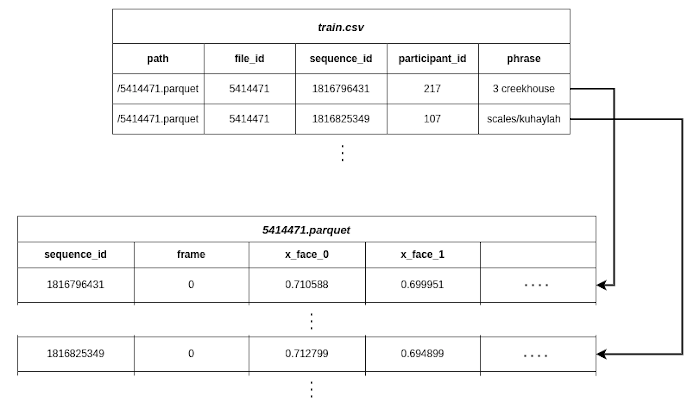

### Landmarks Files Explore
#### The perquet files
train/supplemental_landmarks - The landmark data.  
The landmarks were extracted from raw videos with the MediaPipe holistic model. and they are given in a parquet format files.

* sequence_id - A unique identifier for the landmark sequence. landmark files contain approximately 1,000 sequences. The sequence ID is used as the dataframe index.
* frame - The frame number within a landmark sequence.
* [x/y/z]_[type]_[landmark_index] - The type of landmark is one of ['face', 'left_hand', 'pose', 'right_hand'].  
There are now 1,629 spatial coordinate columns for the x, y and z coordinates for each of the 543 landmarks:  
right_hand: 21 +  
left_hand: 21 +   
pose: 33 +  
face: 468 =  
543 * 3 (for x,y,z) = 1629  
__we consider ignoring the face and pose coordinates.__



### Example
In order to understand better how the data looks, Let's look for an example at the first row in the train.csv file:

In [8]:
train_df.loc[0]

path              train_landmarks/5414471.parquet
file_id                                   5414471
sequence_id                            1816796431
participant_id                                217
phrase                               3 creekhouse
Name: 0, dtype: object

In [9]:
#save the row values in variabls
file_id, sequence_id, phrase = train_df.loc[0][['file_id','sequence_id','phrase']]
print(f"file_id: {file_id}, sequence_id: {sequence_id}, phrase: {phrase}")

file_id: 5414471, sequence_id: 1816796431, phrase: 3 creekhouse


Now, we will read the parquet file from the train_landmarks folder:  
in order to read and write a parquet format, we need to install the pyarrow library.  
The functions read_table() and write_table() read and write the pyarrow.Table object, respectivelyimport pyarrow.parquet as pq

In [10]:
import pyarrow.parquet as pq
#read the file according to the String variable - file_id:
example_df = pq.read_table(f"/kaggle/input/asl-fingerspelling/train_landmarks/{str(file_id)}.parquet")
example_df.shape

(162699, 1631)

Convert the parquet file to a pandas DataFrame:

In [11]:
example_df = example_df.to_pandas()

In [12]:
example_df.head()

,frame,x_face_0,x_face_1,x_face_2,x_face_3,x_face_4,x_face_5,x_face_6,x_face_7,x_face_8,...,z_right_hand_11,z_right_hand_12,z_right_hand_13,z_right_hand_14,z_right_hand_15,z_right_hand_16,z_right_hand_17,z_right_hand_18,z_right_hand_19,z_right_hand_20
sequence_id,,,,,,,,,,,,,,,,,,,,,
1816796431,0,0.710588,0.699951,0.705657,0.691768,0.699669,0.701980,0.709724,0.610405,0.712660,...,-0.245855,-0.269148,-0.129743,-0.251501,-0.278687,-0.266530,-0.152852,-0.257519,-0.275822,-0.266876
1816796431,1,0.709525,0.697582,0.703713,0.691016,0.697576,0.700467,0.709796,0.616540,0.713729,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1816796431,2,0.711059,0.700858,0.706272,0.693285,0.700825,0.703319,0.711549,0.615606,0.715143,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1816796431,3,0.712799,0.702518,0.707840,0.694899,0.702445,0.704794,0.712483,0.625044,0.715677,...,-0.370770,-0.408097,-0.185217,-0.325494,-0.343373,-0.328294,-0.203126,-0.315719,-0.326104,-0.314282
1816796431,4,0.712349,0.705451,0.709918,0.696006,0.705180,0.706928,0.712685,0.614356,0.714875,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We tried to get only the specific sequence_id entries, but as show below, the sequence_id is not a key.

In [13]:
if 'sequence_id' in example_df.keys():
    print('true')
else:
    print('false')

false


In this DataFrame, the 'sequence_id' is not a regular column. Instead, it is used as an index for the DataFrame. So we can select it by using the loc function that returns the entries by an index.

In [14]:
sample_sequence_df = example_df.loc[sequence_id]
print(f"shape: {sample_sequence_df.shape}")
sample_sequence_df.head()
# sample_sequence_df contains only the phrase '3 creekhouse' with it's uniqe sequence_id .

shape: (123, 1630)


,frame,x_face_0,x_face_1,x_face_2,x_face_3,x_face_4,x_face_5,x_face_6,x_face_7,x_face_8,...,z_right_hand_11,z_right_hand_12,z_right_hand_13,z_right_hand_14,z_right_hand_15,z_right_hand_16,z_right_hand_17,z_right_hand_18,z_right_hand_19,z_right_hand_20
sequence_id,,,,,,,,,,,,,,,,,,,,,
1816796431,0,0.710588,0.699951,0.705657,0.691768,0.699669,0.701980,0.709724,0.610405,0.712660,...,-0.245855,-0.269148,-0.129743,-0.251501,-0.278687,-0.266530,-0.152852,-0.257519,-0.275822,-0.266876
1816796431,1,0.709525,0.697582,0.703713,0.691016,0.697576,0.700467,0.709796,0.616540,0.713729,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1816796431,2,0.711059,0.700858,0.706272,0.693285,0.700825,0.703319,0.711549,0.615606,0.715143,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1816796431,3,0.712799,0.702518,0.707840,0.694899,0.702445,0.704794,0.712483,0.625044,0.715677,...,-0.370770,-0.408097,-0.185217,-0.325494,-0.343373,-0.328294,-0.203126,-0.315719,-0.326104,-0.314282
1816796431,4,0.712349,0.705451,0.709918,0.696006,0.705180,0.706928,0.712685,0.614356,0.714875,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can see that the shape of the DataFrame is 123 * 1630.  
This phrase (3 creekhouse) contains:  
123 entries / frames - images in this sequence.  
1630 columns including 1628 landmark coordinates.

# Data Visualization
These are the hand signs of the English language  
![](http://upload.wikimedia.org/wikipedia/commons/thumb/c/c8/Asl_alphabet_gallaudet.svg/800px-Asl_alphabet_gallaudet.svg.png)  
Let's visualize only the hand landmarks data for the phrase '3 creekhouse' using the [hand landmarker apis](https://developers.google.com/mediapipe/solutions/vision/hand_landmarker) of the [mediapipe](https://developers.google.com/mediapipe) library.\
Hand landmarks represent the key points on a human hand.


This image shows the 21 landmarks / key points of the hand:  
![](https://developers.google.com/static/mediapipe/images/solutions/hand-landmarks.png)

We would like to see the video as a video and not as individual images of frames, That's why we will try to represent the information through animation - which is a presentation of image after image at a constant speed.
In order to make an animation from the frame images, We build an animation function.  
To build an animation from given images in Python, we can use the matplotlib.animation module for animation visualization, which is a part of the matplotlib library.

In [15]:
import os
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import animation, rc

Create the animation function:

In [16]:
matplotlib.rcParams['animation.embed_limit'] = 2**128
matplotlib.rcParams['savefig.pad_inches'] = 0
# enables interactive display of animations in Jupyter Notebook 
rc('animation', html='jshtml')

def animate_images(images):
    # create a figure with size 6x9 inches (width x height).
    fig = plt.figure(figsize=(6, 9))
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    # add the created Axes object to the figure.
    fig.add_axes(ax)
    # Display the first image in the images list on the Axes object ax
    im=ax.imshow(images[0], cmap="gray")
    plt.close(fig)
    
    def animate_func(i):
        im.set_array(images[i])
        return [im]
    # interval of 100 milliseconds (equivalent to 10 frames per second)
    return animation.FuncAnimation(fig, animate_func, frames=len(images), interval=1000/10)

In [17]:
!pip install mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.6/33.6 MB 31.7 MB/s eta 0:00:0000:0100:01


In [18]:
import mediapipe
import numpy as np

# get the landmark_pb2 module from mediapipe library:
from mediapipe.framework.formats import landmark_pb2

Extract the landmark data and convert it to an image using [medipipe library](https://developers.google.com/mediapipe/solutions/vision/hand_landmarker/python).  
This function extracts the data for the left and right hands.  
We take the hands x,y,z coordinats from our sample data frame.


In [19]:
mp_pose = mediapipe.solutions.pose
mp_hands = mediapipe.solutions.hands
mp_drawing = mediapipe.solutions.drawing_utils 
mp_drawing_styles = mediapipe.solutions.drawing_styles

def get_hands(seq_df):
    images = []
    all_hand_landmarks = []
    
    # get the right hand coordinates from the seq_df data frame. loop over the seq_df entries - frames.
    for seq_idx in range(len(seq_df)):
        x_hand = seq_df.iloc[seq_idx].filter(regex="x_right_hand.*").values
        y_hand = seq_df.iloc[seq_idx].filter(regex="y_right_hand.*").values
        z_hand = seq_df.iloc[seq_idx].filter(regex="z_right_hand.*").values

        # creates a 600x600 RGB image.
        # Each pixel is represented by a triplet of values (R, G, B),
        # where each component can take values between 0 and 255 (inclusive) to represent different colors.
        # Since all values are zero, the image is entirely black.
        right_hand_image = np.zeros((600, 600, 3)) 

        # create a normalized landmark list structure.
        right_hand_landmarks = landmark_pb2.NormalizedLandmarkList()
        
        # add the x,y,z landmarks to the right_hand_landmarks list
        for x, y, z in zip(x_hand, y_hand, z_hand):
            right_hand_landmarks.landmark.add(x=x, y=y, z=z)

        #draw the right hand landmarks on the right_hand_image
        mp_drawing.draw_landmarks(
                right_hand_image,
                right_hand_landmarks,
                mp_hands.HAND_CONNECTIONS,
                landmark_drawing_spec=mp_drawing_styles.get_default_hand_landmarks_style())
        
        # get the left hand coordinates from the seq_df data frame.
        x_hand = seq_df.iloc[seq_idx].filter(regex="x_left_hand.*").values
        y_hand = seq_df.iloc[seq_idx].filter(regex="y_left_hand.*").values
        z_hand = seq_df.iloc[seq_idx].filter(regex="z_left_hand.*").values
        
        left_hand_image = np.zeros((600, 600, 3))
        
        left_hand_landmarks = landmark_pb2.NormalizedLandmarkList()
       
        # add the x,y,z landmarks to the left_hand_landmarks list
        for x, y, z in zip(x_hand, y_hand, z_hand):
            left_hand_landmarks.landmark.add(x=x, y=y, z=z)

        #draw the left hand landmarks on the left_hand_image
        mp_drawing.draw_landmarks(
                left_hand_image,
                left_hand_landmarks,
                mp_hands.HAND_CONNECTIONS,
                landmark_drawing_spec=mp_drawing_styles.get_default_hand_landmarks_style())
        
        images.append([right_hand_image.astype(np.uint8), left_hand_image.astype(np.uint8)])
        all_hand_landmarks.append([right_hand_landmarks, left_hand_landmarks])
    return images, all_hand_landmarks


Now Let's call to our animation function with the images of the phrase '3 creekhouse'
After one visualization attempt, we noticed that there were a large number of empty frames. In order to show a smoother visual, we will omit the empty frames. Of course, later we will consider what we should do about this fact.

In [20]:
clean_sample_df = sample_sequence_df.filter(regex=r'_right_hand_|_left_hand_').dropna(how = 'all')
print(f"{'Amount of clean frames: '} {clean_sample_df.shape}")
print(f"{'The phrase: '}{phrase}{', Length of phrase: '}{len(phrase)}")
clean_sample_df.head()

Amount of clean frames:  (58, 126)
The phrase: 3 creekhouse, Length of phrase: 12


,x_left_hand_0,x_left_hand_1,x_left_hand_2,x_left_hand_3,x_left_hand_4,x_left_hand_5,x_left_hand_6,x_left_hand_7,x_left_hand_8,x_left_hand_9,...,z_right_hand_11,z_right_hand_12,z_right_hand_13,z_right_hand_14,z_right_hand_15,z_right_hand_16,z_right_hand_17,z_right_hand_18,z_right_hand_19,z_right_hand_20
sequence_id,,,,,,,,,,,,,,,,,,,,,
1816796431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.245855,-0.269148,-0.129743,-0.251501,-0.278687,-0.266530,-0.152852,-0.257519,-0.275822,-0.266876
1816796431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.370770,-0.408097,-0.185217,-0.325494,-0.343373,-0.328294,-0.203126,-0.315719,-0.326104,-0.314282
1816796431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.285770,-0.318548,-0.155317,-0.274822,-0.312119,-0.316411,-0.181363,-0.286298,-0.316182,-0.322671
1816796431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.235725,-0.267054,-0.141380,-0.219369,-0.256553,-0.273690,-0.170996,-0.240285,-0.266193,-0.278110
1816796431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.186706,-0.217181,-0.107740,-0.165642,-0.201059,-0.222898,-0.131329,-0.183113,-0.208774,-0.225284


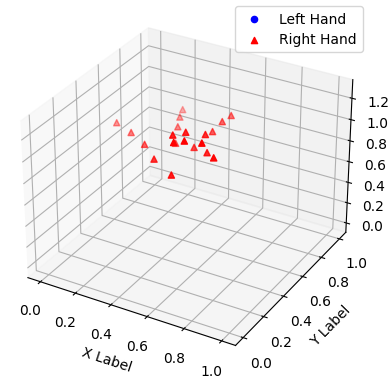

In [38]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

entry_to_visualize = clean_sample_df.iloc[0]
# Extract x, y, z values for left and right hand
x_left = entry_to_visualize.filter(regex='x_left_hand').values
y_left = entry_to_visualize.filter(regex='y_left_hand').values
z_left = entry_to_visualize.filter(regex='z_left_hand').values

x_right = 1- entry_to_visualize.filter(regex='x_right_hand').values
y_right = 1-entry_to_visualize.filter(regex='y_right_hand').values
z_right = 1-entry_to_visualize.filter(regex='z_right_hand').values
# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot left hand
ax.scatter(x_left, y_left, z_left, c='b', marker='o', label='Left Hand')

# Plot right hand
ax.scatter(x_right, y_right, z_right   , c='r', marker='^', label='Right Hand')

# Set axis labels
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# Add a legend
ax.legend()

# Show the plot
plt.show()


We wanted to see in a 3D graph what the hand looks like after extracting the hand key points. In the graph above we drew the first entry in data, in order to see visually and three-dimensionally the x,y,z values of the hand signs.  
We can see that the left hand is not appear in the graph, that becouse this specific video does not contains the left hand and all it's values are nan.

We chose to make a right hand visual, since in this example, there are no left hand frames at all.  
Now we get much more clean animation.

In [24]:
# Get the images visualization using mediapipe apis
hand_images, hand_landmarks = get_hands(clean_sample_df)
# Fetch and show the data for right hand
animate_images(np.array(hand_images)[:,0])

# Clean the data
Our dataset contains some unnecessary data. In order to get much more efficient result when training future models, we need to clean our data.  
Our dataset is consist of perquet files and we want to delete / change those files.  
Parquet files are designed for efficient columnar storage and are not intended to be modified in place. This means that we cannot directly delete columns or rows from a Parquet file itself.  
We need to clean the data and then rewrite the modified data to a new file.  
After review some moduls we consider to train, we want to rewrite the modified data to some file format that balances efficiency, ease of use, and compatibility with the libraries and tools we plan to use. 
  
Since the purpose of our prediction is hand marks, we would like to omit all the coordinates of face and pose, and remain ONLY with the coordinates of the right and left hands.  
We will save variables for the desired coordinates.
  
### Create x,y,z label names from coordinates
create lists for each dimension in coordinates. when 21 is the number of key points in the hands.  
FEATURE_COLUMNS conists all the necessary columns that will be our dataset featers.

In [33]:
X = [f'x_right_hand_{i}' for i in range(21)] + [f'x_left_hand_{i}' for i in range(21)]
Y = [f'y_right_hand_{i}' for i in range(21)] + [f'y_left_hand_{i}' for i in range(21)]
Z = [f'z_right_hand_{i}' for i in range(21)] + [f'z_left_hand_{i}' for i in range(21)]

# all the necessary columns
FEATURE_COLUMNS = X + Y + Z

Store in a list id's for each coordinate column.

In [35]:
X_IDX = [i for i, col in enumerate(FEATURE_COLUMNS)  if "x_" in col]
Y_IDX = [i for i, col in enumerate(FEATURE_COLUMNS)  if "y_" in col]
Z_IDX = [i for i, col in enumerate(FEATURE_COLUMNS)  if "z_" in col]

RHAND_IDX = [i for i, col in enumerate(FEATURE_COLUMNS)  if "right" in col]
LHAND_IDX = [i for i, col in enumerate(FEATURE_COLUMNS)  if  "left" in col]

# Text Analysis:
We will try to diagnose our target data. For each video segment there is the class data which is the translated phrase. We would like to understand and observe this figure.  
Each phrase is a string of words, numbers and signs.  
As we said above, the phrase data is divided into 3 classes: addresses, phone numbers and websites.  
We will build a function that will identify according to a certain pattern which class each string refers to, and we will represent a pie graph in which we will see the amount from each class.

In [29]:
import pandas as pd
import re

df = train_df
# Create a new column 'phrase_type' to store the type of each phrase
df['phrase_type'] = 'other'

def get_phrase_type(phrase):
    # Phone Number
    if re.match(r'^\+?[0-9\s\-\(\).]+[0-9]$', phrase):
        return 'phone_number'
    # url
    elif any([substr in phrase for substr in ['http', 'www', '.', '/']]) and ' ' not in phrase:
        return 'url'
    # Address
    else:
        return 'address'
    
df['phrase_type'] = df['phrase'].apply(get_phrase_type)

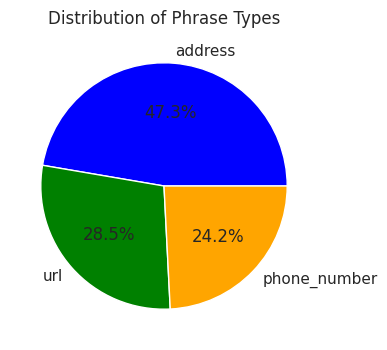

In [30]:
import matplotlib.pyplot as plt

# Count the occurrences of each phrase type
phrase_type_counts = df['phrase_type'].value_counts()

plt.figure(figsize=(4, 4))
plt.pie(phrase_type_counts, labels=phrase_type_counts.index, autopct='%1.1f%%', colors=['blue', 'green', 'orange', 'gray'])
plt.title('Distribution of Phrase Types')
plt.show()


It is always good to know what our target data consists of.  
In this case, we have mentioned above the three types of texts. 
You can see that almost half of the data are addresses, a quarter for websites and a quarter for phone numbers.  
We will look at the classes from a different angle, take the strings and build a word cloud from them.  
Let's see what the results are:

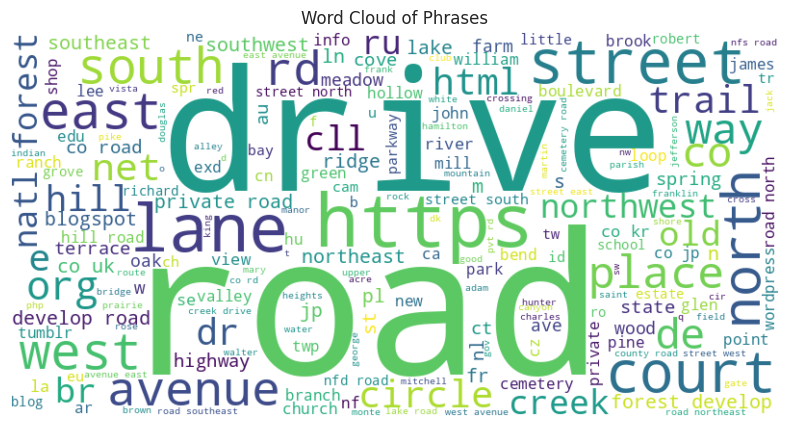

In [31]:
from wordcloud import WordCloud

# Concatenate all phrases into a single string
all_phrases = ' '.join(df['phrase'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_phrases)

# Plot word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Phrases')
plt.show()



How nice! According to the pie map we built, you can see that indeed the highest percentage of data are addresses. When we look at the word cloud which shows by size the frequency of the occurrence of words in the data set, it seems that words like road, drive, street, north, west, east, and avenue appear in large sizes, and are indeed associated with addresses. After them there are the words: http, info, wordpress, and co, which are associated with websites. We will not see the phone numbers, since they are not words.
That's a nice way to see the amount of each word and each type of phrase.

Let's see the supplemental sort of texts.  
Let's see what are the most repeated words in this type of texts: Texts associated with natural language and everyday sentences.

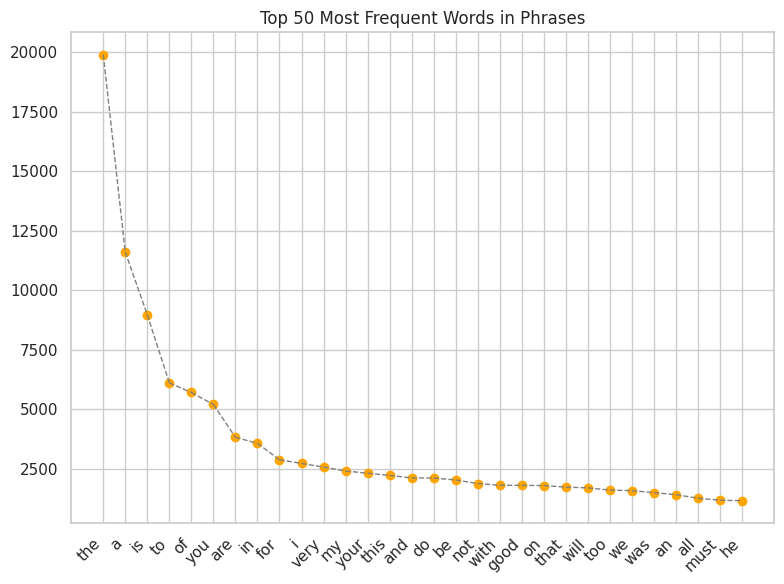

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Tokenize the phrases and count the occurrences of each word
all_words = ' '.join(supp_df['phrase']).split()
word_counts = Counter(all_words)

# Get the 50 most frequent words
top_words = dict(word_counts.most_common(30))

# Create a DataFrame for plotting
top_words_df = pd.DataFrame(list(top_words.items()), columns=['Word', 'Frequency'])

# Sort the DataFrame by frequency
top_words_df = top_words_df.sort_values(by='Frequency', ascending=False)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(top_words_df['Word'], top_words_df['Frequency'], color='orange', marker='o')

# Connect dots with lines
for i in range(1, len(top_words_df)):
    plt.plot([top_words_df['Word'].iloc[i - 1], top_words_df['Word'].iloc[i]],
             [top_words_df['Frequency'].iloc[i - 1], top_words_df['Frequency'].iloc[i]],
             color='gray', linestyle='--', linewidth=1)


plt.title('Top 50 Most Frequent Words in Phrases')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

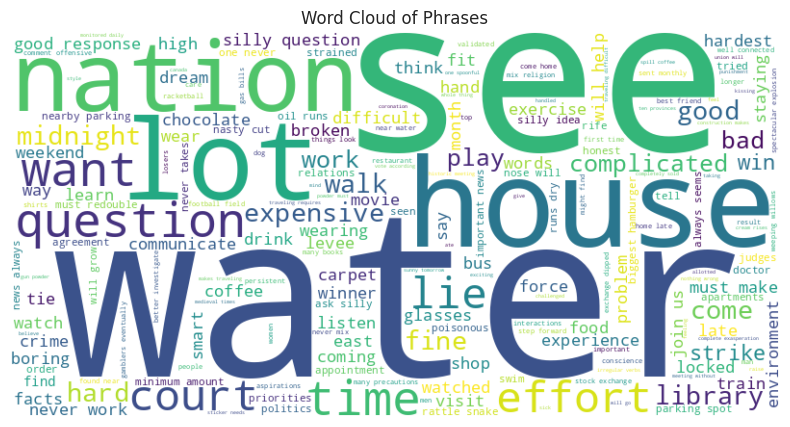

In [66]:
from wordcloud import WordCloud

# Concatenate all phrases into a single string
all_phrases = ' '.join(supp_df['phrase'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_phrases)

# Plot word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Phrases')
plt.show()

Let's look at the two diagrams above, one of them shows us the most common words from all the strings given to us in the supplemental dataset. And one of them uses the word cloud function to show the most common words. We will notice that the words that appear at the beginning of the graph, that is, the words with the most appearances are completely different from the words that appear in the word cloud. This case happens because the function of the word cloud automatically recognize words of a type Stopwords: Common words like "the," "and," or "is" are typically removed from the word cloud since they don't provide much insight into the content.  
The fact that more than 20,000 words are Stopwords, we can indeed know that this type of data is natural sentences.  
The most frequent content words can be seen in the word cloud.  
We chose the more challenging dataset, in which, in addition to natural words, there are also numbers and signs.

# Common Pharses
Let's see which sentences are repeated the most in each of our data structures:

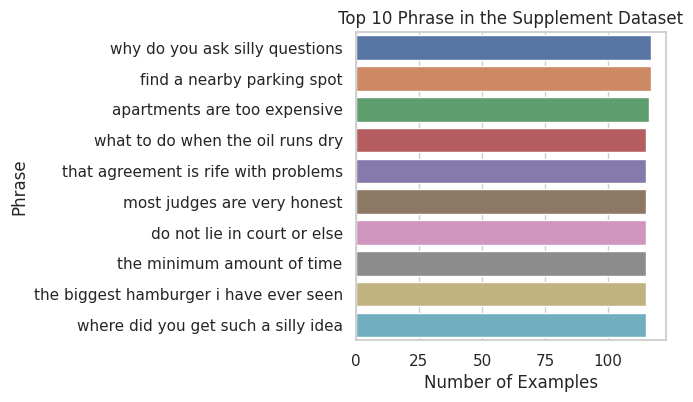

In [68]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(4, 4))

sns.barplot(
    y=supp_df["phrase"].value_counts().head(10).sort_values(ascending=False).index,
    x=supp_df["phrase"].value_counts().head(10).sort_values(ascending=False),
    ax=ax,
)

ax.set_title("Top 10 Phrase in the Supplement Dataset")
ax.set_xlabel("Number of Examples")
ax.set_ylabel("Phrase")
plt.show()

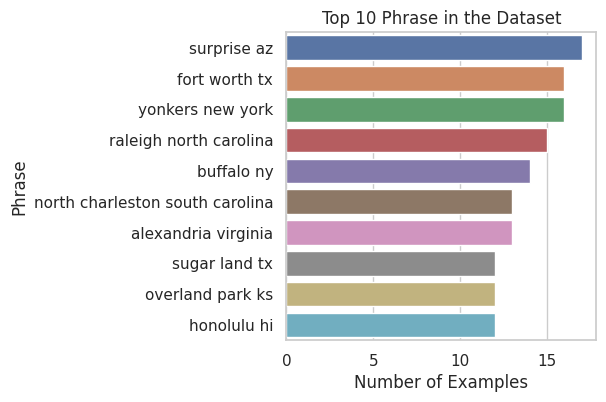

In [69]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(4, 4))

sns.barplot(
    y=train_df["phrase"].value_counts().head(10).sort_values(ascending=False).index,
    x=train_df["phrase"].value_counts().head(10).sort_values(ascending=False),
    ax=ax,
)

ax.set_title("Top 10 Phrase in the Dataset")
ax.set_xlabel("Number of Examples")
ax.set_ylabel("Phrase")
plt.show()

Another reason to choose the train set:  
You can see that there is a greater repetition of the same sentences in the supplement set, while in the training there is much less repetition, and the sentences are very diverse - which gives us a larger space of examples on which to train models.

# Participants in the Data
Just curious to check the Participant ID feature, to see how many participants there are, and how many movies each provided to our database.

The number of participants in out Database is: 
94


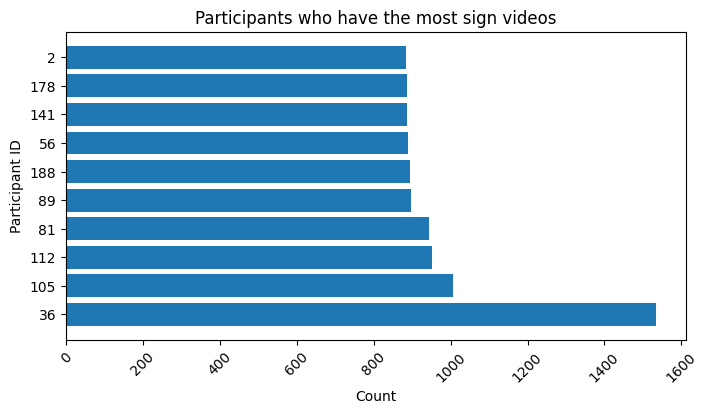

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

print("The number of participants in out Database is: ")
print(train_df["participant_id"].nunique())

participant_counts = train_df["participant_id"].value_counts().head(10)

# Extract the participant IDs and their counts
participant_ids = participant_counts.index
counts = participant_counts.values

plt.figure(figsize=(8, 4)) 
plt.barh(range(len(participant_ids)), counts, tick_label=participant_ids)

# Set labels and title
plt.xlabel("Count")
plt.ylabel("Participant ID")
plt.title("Participants who have the most sign videos")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()


In [8]:
print("The number of video sequences is: ")
print(train_df['sequence_id'].nunique())

The number of video sequences is: 
67208


We have 67,208 videos and only 94 participants, relatively little for the amount of videos we have.  That is, each participant has filmed a lot of videos!  From the diagram above, you can see that each participant actually filmed on average 900 video clips!  Interesting...

# Statistics
To clean the data in the best way we will want to investigate some properties in order to decide the sizes and adjustments we want to create.
# Phrase statistics
We would like to examine our information in depth, we will look at the statistics on our phrases lengths.  
Phrase length - get the number of characters in each phrase.

In [2]:
phrases_lengths = train_df['phrase'].apply(len)

# Statistics on phrases Lengths
display(phrases_lengths.describe().to_frame().round(1))

,phrase
count,67208.0
mean,17.8
std,5.7
min,1.0
25%,12.0
50%,17.0
75%,22.0
max,31.0


How many sequences do we have in our data?

In [6]:
print(f"We have: {train_df['sequence_id'].nunique()} sequences in total !")

We have: 67208 sequences in total !


# Number of frames per character
Our database is a collection of video clips that record hand signal markers.
Unlike a collection of images, which are classified into classes, with us it is more complex.  
We have a video segment classified to an english sentence, where each letter can continue for a large number of frames, depending on the frame rate of the video. In other words, in the number of frames per second in which the segment was recorded.  
Therefore, we would like to observe and examine the distribution of the number of frames for marking one hand sign.

In [20]:
from tqdm import tqdm
# Key: the number of frames per chararcter, Value: amount of apperance
frames_per_char_dict = dict()
no_nan_frames_per_char_dict = dict()

for file_id in tqdm(train_df.file_id.unique()):
        
    file_path = f"/kaggle/input/asl-fingerspelling/train_landmarks/{file_id}.parquet"
    
    # take only the necessary columns from the perquet file.
    parquet_df = pq.read_table(file_path, columns=['sequence_id'] + FEATURE_COLUMNS).to_pandas()
    
    # Filter train.csv and fetch entries only for the relevant current file_id
    # For the phrase data
    
    file_df = train_df.loc[train_df["file_id"] == file_id]
    file_df = file_df.set_index('sequence_id')
   
    # Loop through each sequence - phrase frames.
    for group, group_df in parquet_df.groupby('sequence_id'):
        
        phrase = file_df.loc[group, 'phrase']
        
        ### all frames ###
        
        # The len method counts nan - entries.
        frames_per_char = len(group_df) // len(phrase)
        
        # Save the numbers of frames_per_char with no duplicats
        # Using try and except for cases the key already in the dict or not.
        try:
            
            # Increase the amount of apperance
            frames_per_char_dict[frames_per_char] += 1
            
        except :
            
            # Add a new frames_per_char instance
            frames_per_char_dict[frames_per_char] = 1
        
        ### no nan #### 
        
        no_nan_frames_per_char = len(group_df.dropna(how = 'all')) // len(phrase)
        
        # Notice for myself - this cotinue, skip this iterate !
        # Omit the zero column. explanation below
        if no_nan_frames_per_char == 0:
            continue
        
        try:
            no_nan_frames_per_char_dict[no_nan_frames_per_char] += 1
            
        except:
            no_nan_frames_per_char_dict[no_nan_frames_per_char] = 1

100%|██████████| 68/68 [01:37<00:00,  1.44s/it]


In [21]:
# Describe the first Series and create a DataFrame
summary_1 = pd.Series(list(frames_per_char_dict.keys()), name='all frames').describe().to_frame().round(1)

# Describe the second Series and create a DataFrame
summary_2 = pd.Series(list(no_nan_frames_per_char_dict.keys()), name='no nan').describe().to_frame().round(1)

# Concatenate the two DataFrames side by side
side_by_side = pd.concat([summary_1, summary_2], axis=1)

print('Frames per character statistics')
display(side_by_side)

Frames per character statistics


,all frames,no nan
count,40.0,33.0
mean,20.5,17.4
std,14.1,10.4
min,0.0,1.0
25%,9.8,9.0
50%,19.5,17.0
75%,29.2,25.0
max,67.0,42.0


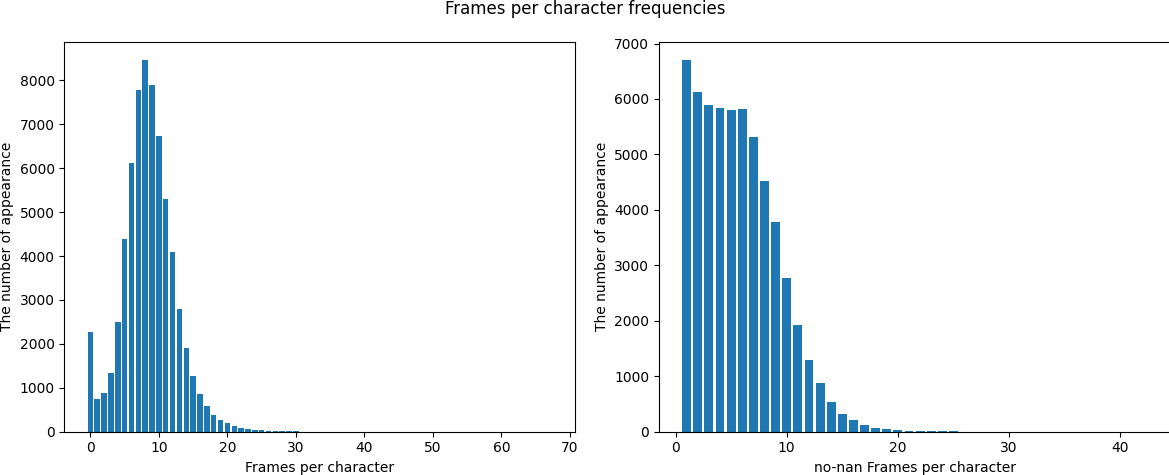

In [22]:
keys_1 = list(frames_per_char_dict.keys())
values_1 = list(frames_per_char_dict.values())


keys_2 = list(no_nan_frames_per_char_dict.keys())
values_2 = list(no_nan_frames_per_char_dict.values())

# Create a 1x2 grid of subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot for the first data
axes[0].bar(keys_1, values_1)
axes[0].set_xlabel('Frames per character')
axes[0].set_ylabel('The number of appearance')

# Plot for the second data
axes[1].bar(keys_2, values_2)
axes[1].set_xlabel('no-nan Frames per character')
axes[1].set_ylabel('The number of appearance')


plt.suptitle('Frames per character frequencies')

# Adjust layout for readability
plt.tight_layout()

# Show the plots
plt.show()

Here is the distribution of the frequency for each number of frames per character, over all the videos in our data.  
In the left graph the distribution is for all frames.  
In the right graph the distribution is for no - nan frames, here we did not count the empty frames.  
In the left graph, we see that the most frequent is in the area of 9 frames per character.  
So it can be concluded that the resolution of the video is very high because the frame rate is high, if each letter has 9 frames on average.  
but, when comparing it to the right graph, we can see that the frequency for the number of frames per char has decreased.  
  
While working on the right graph, we noticed that when the number of frames for a signal equals 0, it has a relatively high frequency. This happens, because we does not count the NAN lines, but nevertheless there is an empty data frame, so 0 frames were counted. We omitted the zero column in the code, in order not to disrupt the statistics.  
  
In the left graph the 0 column can not contain real zeros, but rather this column contains very small numbers rounded to 0.  
It can be concluded that in fact there is a relatively large amount of sequences whose number of frames is less than the length of their phrase.  
There is no point in using this data, and we will filter it in the processing later.
  
When all frames in one sequence are empty, we certainly won't need this information, as it is missing. We will have to get rid of it.  
When there is empty frames in a non empty sequence, it might be a space or a break when the person stop recording landmarks to the camera.  
In further process, we will try to compare performance with leave vs delete the empty frames.

# Sequence length - number of frames
In order to use neural networks models with sequences of extracted frames, and these sequences have varying lengths, we will need to add padding to the smaller sequences, and resize the bigger, to make them all the same length.  
Let's look at the distribution of Sequences lengths.

In [23]:
# Get the frequency of no nan frames in each sequence


no_nan_frames = []
num_frames = []

for file_id in tqdm(train_df.file_id.unique()):
        
    # Parquet file name
    file_path = f"/kaggle/input/asl-fingerspelling/train_landmarks/{file_id}.parquet"
    
    # take only the necessary columns from the perquet file.
    parquet_df = pq.read_table(file_path, columns=['sequence_id'] + FEATURE_COLUMNS).to_pandas()
    
    # Loop through each sequence - phrase frames.
    for group, group_df in parquet_df.groupby('sequence_id'):
        
        no_nan_frames.append( len(group_df.dropna(how = 'all')) )
        num_frames.append( group_df.shape[0] )
        

100%|██████████| 68/68 [01:24<00:00,  1.24s/it]


In [24]:
# Describe the first Series and create a DataFrame
summary_3 = pd.Series(no_nan_frames, name = 'no nan frames per sequence').describe().to_frame().round(1)
summary_4 = pd.Series(num_frames, name = 'frames per sequence').describe().to_frame().round(1)

# Concatenate the two DataFrames side by side
side_by_side = pd.concat([summary_3, summary_4], axis=1)

print('Frames per sequence statistics')
display(side_by_side)

Frames per sequence statistics


,no nan frames per sequence,frames per sequence
count,67208.0,67208.0
mean,93.7,159.7
std,73.5,84.2
min,1.0,1.0
25%,35.0,104.0
50%,81.0,148.0
75%,135.0,207.0
max,598.0,807.0


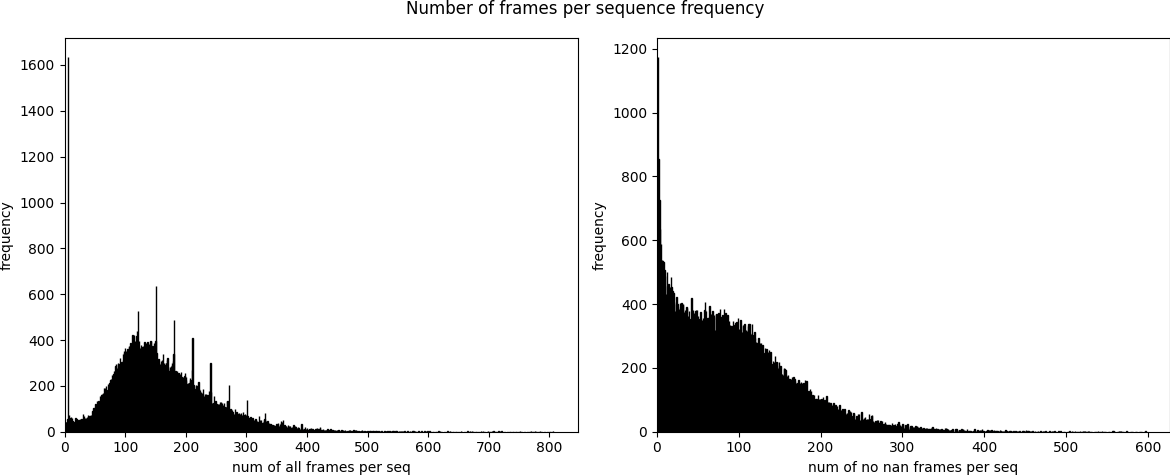

In [25]:
data_1 = num_frames
data_2 = no_nan_frames

# Create a figure with two subplots arranged side by side
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Create histograms for data_1 and data_2
axs[0].hist(data_1, bins=range(min(data_1), max(data_1) + 1),edgecolor='black', align='left', rwidth=0.5)
axs[1].hist(data_2, bins=range(min(data_2), max(data_2) + 1),edgecolor='black', align='left', rwidth=0.5)

# Set the x and y axis
for ax in axs:
    ax.set_xlim(0,)
    
# Label the axes and set titles for each subplot
axs[0].set_xlabel('num of all frames per seq')
axs[0].set_ylabel('frequency')

axs[1].set_xlabel('num of no nan frames per seq')
axs[1].set_ylabel('frequency')

plt.suptitle('Number of frames per sequence frequency')

# Adjust layout for readability
plt.tight_layout()

# Show the plot
plt.show()


In [14]:
print(f"We have: {train_df['file_id'].nunique()} file in total !")

We have: 68 file in total !


# Phrase length VS Frame count
We would like to see in a good visual way the effect between the length of the string and the number of frames in the section.  
We will do this on a small example from one video segment.  
We will count the number of frames for each segment, and calculate the length of the string for each segment and present them simultaneously next to each other.

In [90]:
import pyarrow.parquet as pq
sample_file = train_df["file_id"][0] 
file_path = f"/kaggle/input/asl-fingerspelling/train_landmarks/{sample_file}.parquet"
parquet_df = pq.read_table(file_path, columns=['sequence_id'] + FEATURE_COLUMNS).to_pandas()

frames_list = parquet_df.groupby(parquet_df.index, dropna = False).size().to_dict()

In [96]:
# dataFrame to reserch and visualize the results
frame_df = pd.merge(train_df, pd.DataFrame(frames_list.items(), columns=["sequence_id", "frame_count"]), on="sequence_id")
frame_df["phrase_len"] = frame_df["phrase"].str.len()
frame_df["word_count"] = frame_df["phrase"].str.split(" ").apply(len)

In [99]:
vis_df = frame_df.head(50)

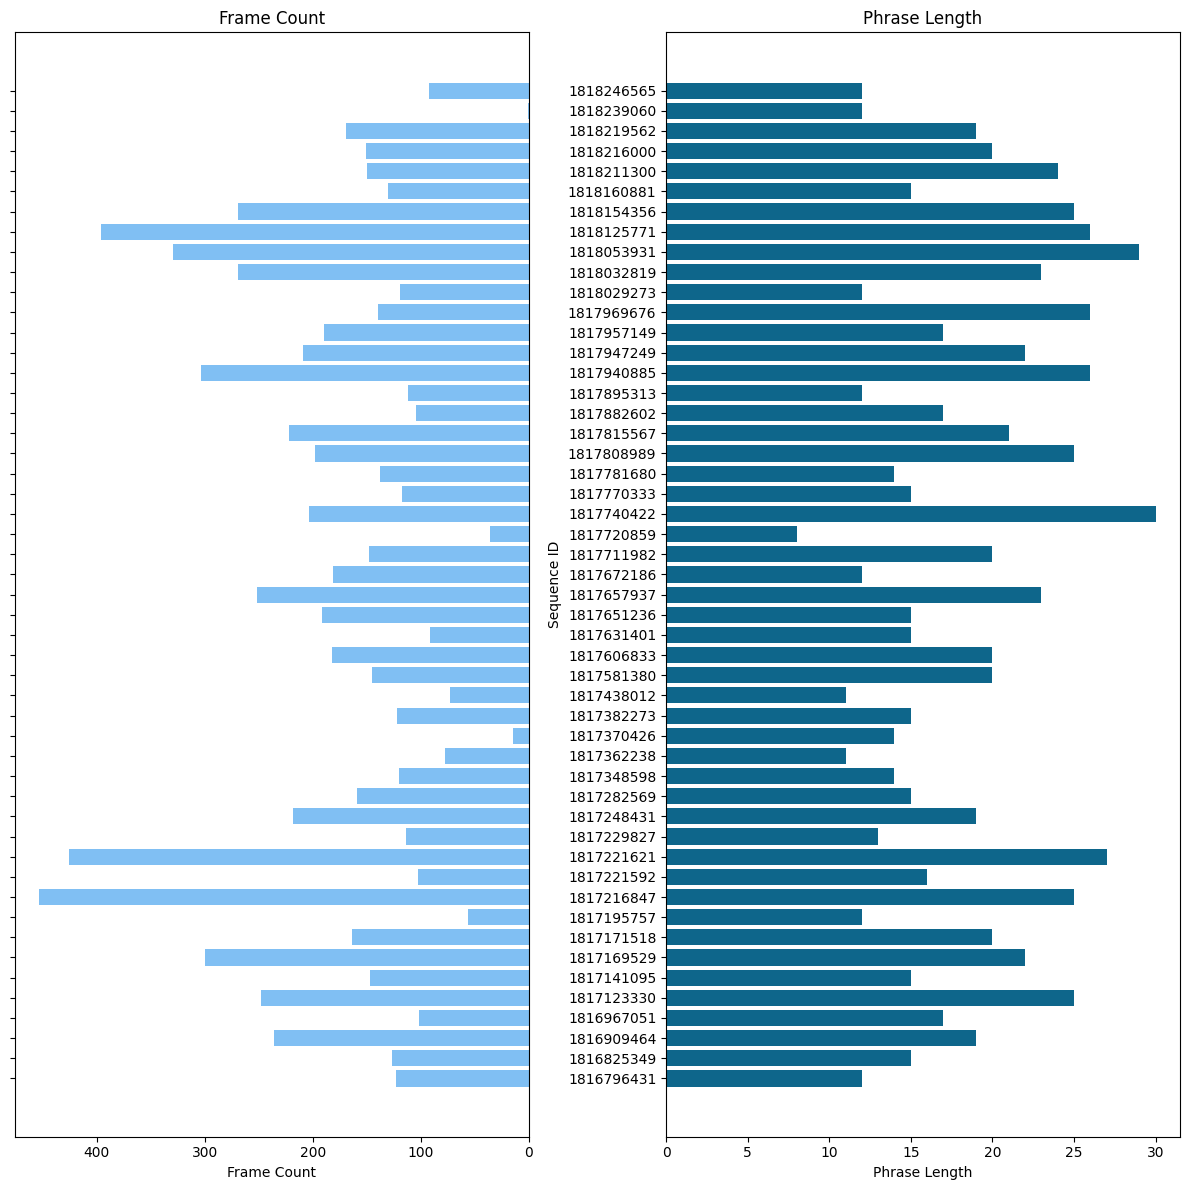

In [105]:
import matplotlib.pyplot as plt


# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 12))

# Subplot 1: Frame Count vs. Sequence ID 
ax1.barh(vis_df['sequence_id'].astype(str), vis_df['frame_count'], color='#80bff3') 
ax1.set_xlabel('Frame Count')
ax1.set_yticklabels([])  # Remove y-axis labels
ax1.set_title('Frame Count')
ax1.invert_xaxis()

# Subplot 2: Phrase Length vs. Sequence ID 
ax2.barh(vis_df['sequence_id'].astype(str), vis_df['phrase_len'], color='#0e668b')
ax2.set_xlabel('Phrase Length')
ax2.set_ylabel('Sequence ID')
ax2.set_title('Phrase Length')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


That's better! In this way and in this comparison we can see the connection and relativity between the factors.  
It should be noted that although this graph shows relativity, in terms of the amount of numbers on the graph they are very different. For each video segment, the number of frames is much greater than the number of letters in the string, which means that the video was shot at a relatively large amount of frames per second. What you can see is that, in general, there is indeed a relationship between the length of the video segment and the length of the sentence that you want to present. Sometimes it seems that there is a problem with the video segment because the relativity is not preserved, the number of frames is relatively small compared to the length of the string that is required to be represented. It could be that the source of the problem is missing frames. The video is missing or there are few frames that are nan. We will have to  filter these videos later in order to clean the data as much as possible.

# Counts of hands
In our database the hand appearing in the video can be left or right.  
In order to give the later models a better training ability, we would like to select the dominant hand in each phrase and do a transform on the other hand.  
Thus we will accept that each phrase will actually have coordinates of only one hand.
  
Let's visulaize the amount of each hand in the videos, in order to decide which hand is the dominant one.
Use plots to visulaize the amount of hand landmark from each hand

In [53]:
import seaborn as sns
import glob
from tqdm import tqdm 

In [27]:
count_both = 0
count_l = 0
count_r = 0
files_both = 0

for file_id in tqdm(train_df.file_id.unique()):
    
    file_path = f"/kaggle/input/asl-fingerspelling/train_landmarks/{file_id}.parquet"
    
    file_df = train_df.loc[train_df["file_id"] == file_id]
    
    parquet_df = pq.read_table(file_path, columns=['sequence_id'] + FEATURE_COLUMNS).to_pandas()
   
    count_l += parquet_df['x_left_hand_0'].count()
    count_r += parquet_df['x_right_hand_0'].count()
    # get the amount of frames with two hands.
    count = parquet_df.dropna(subset=['x_right_hand_0', 'x_left_hand_0']).shape[0]
    count_both += count
    
    if(count != 0):
        files_both += 1


100%|██████████| 68/68 [00:12<00:00,  5.33it/s]


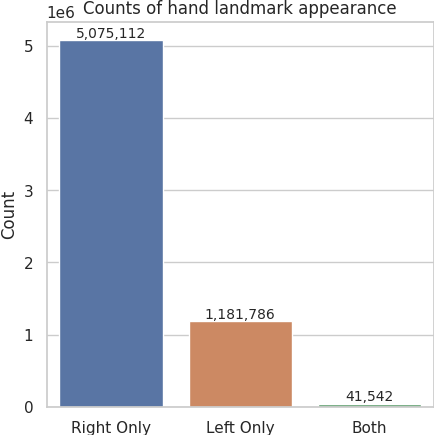

In [28]:
# Visualization

# Create a bar plot using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(5, 5))

# Data for the plot
categories = ['Right Only', 'Left Only', 'Both']
counts = [count_r - count_both, count_l - count_both, count_both]
# Create the bar plot
sns.barplot(x = categories, y = counts)
plt.title("Counts of hand landmark appearance")
plt.ylabel("Count")

for i, count in enumerate(counts):
    plt.text(i, count, f'{count:,}', ha='center', va='bottom', fontsize=10)

plt.show()

We noticed that relatively the amount of entries with two hands is minimal.
We would like to examine the cases in which this occurs and examine whether it is possible to waive these lines in order to switch to landmark with one hand instead of two hands.  
As checked above, in each one of the 68 files, we have entries with two hands.  
  
The assumption we made in our dataset is that when a person speaks sign language using letters, he uses only one hand. So we will ignore the cases of both hands frames, and we will treat them as having one hand.  
  
Each file is a video of a single participant, it can be assumed that the participant has a preferred hand.  
We will choose the dominant hand in each sequence in order to get the coordinates of only one hand, thus facilitating the future training model.  
  
In the overwhelming majority of data, the dominant hand is the right hand. Therefore, we would like all hands to become right. When the left hand will be dominant in a certain sequence, we will perform a reversal operation to right hand.


# Clastering to single characters
We understand our data deeply, and we would like to work on it with the help of clustering.
As we stated, in each video section there are many frames when the frames are divided into groups, in each group one letter from the phrase is shown.  
Since each such group has a number of frames (on average 9 as we saw in the distribution above), each frame represents the same letter with a slight change.  
We would like to classify each frame to the letter to which its group belongs.
In this way we will be able to reach the classification of an image to letter.
After that, we will perform clustering on the data, and see how well the frames can be divided, and the differences between the letters in the sign language.  
  
Let's First try it on a small example: on the first sequence of the first file in the train data frame (Same as the example we used initially).

In [29]:
# the clean sample_sequence_df, with hands only coordinates, and with no nan entries.
hands = clean_sample_df
# clean the columns of the empty hand:
hands = hands.dropna(axis = 1,how = "all")
#save the example values in variabls
file_id, sequence_id, phrase = train_df.loc[0][['file_id','sequence_id','phrase']]

print(f"The target phrase '{phrase}' has {len(phrase)} letters")
print(f"The target phrase '{phrase}' has {len(set(phrase))} unique letters")

The target phrase '3 creekhouse' has 12 letters
The target phrase '3 creekhouse' has 10 unique letters


If we ignore the space we see that there are 9 unique letters in the phrase above.
We are going to try to do clustering into 9 clusters in order to classify each letter into a different cluster.
  
In order to use clustering, we will need to drop a dimension from our data.  
First of all, we would like to see what the current dimension is, and how much to lower it.  
Our example data structure is a two-dimensional array, with 58 rows and 63 columns.  
We need a number of dimensions of a size that can be contained in the dimension space of the database. So that we can do dimensionality reduction.  
We will take the minimum dimension from the number of rows and columns, as n_components must be between 0 and min(n_samples, n_features).
  
We will use PCA - Principle Component Analysis, and take a look at the explained_variance in order to find out how much each dimension in our data affects the information.  
In order to use PCA, we will perform normalization using the sklearn library.

In [30]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
hands = normalize(hands)
# get the current minimum dimension 
n_components = min(hands.shape)
print(f'number of components: {n_components}')
pca  = PCA(n_components = n_components)
pca.fit(hands)
explained_variance = pca.explained_variance_

number of components: 58


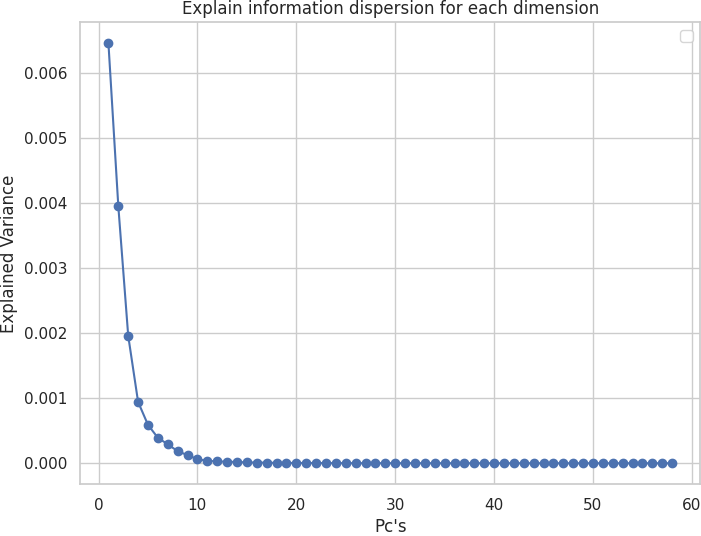

In [31]:
# Visualize:
plt.figure(figsize=(8, 6))

plt.plot(range(1, n_components + 1), explained_variance, marker='o', linestyle='-')

plt.xlabel("Pc's")
plt.ylabel('Explained Variance')
plt.title('Explain information dispersion for each dimension')
plt.legend()
plt.grid(True)
plt.show()

Ok, now we can see what this is all about,  
It is possible to distinguish for each dimension the amount of information it provides us.  
It seems that for dimensions 0-10 the information does have some importance, since the values are higher than 0.0. Yet we notice that the percentages of variance that these PC's captures are not high.  
Actually they are in the range of 0.1% to 0.6%.  
A value of 0.0 or 0% means that the PC captures none of the variance in the data. It retains no information.  
For each dimension numbered greater than 10, it retains no information. Therefore we can easily give up the following dimensions and perform a dimension reduction in the database to 10 dimensions.  
So now we will use the transform function in order to reduce the dimension to 10 pc's.  
Now we can run the k-means clustering algorithm with 9 clusters, for each unique letter in the example phrase.

<function matplotlib.pyplot.show(close=None, block=None)>

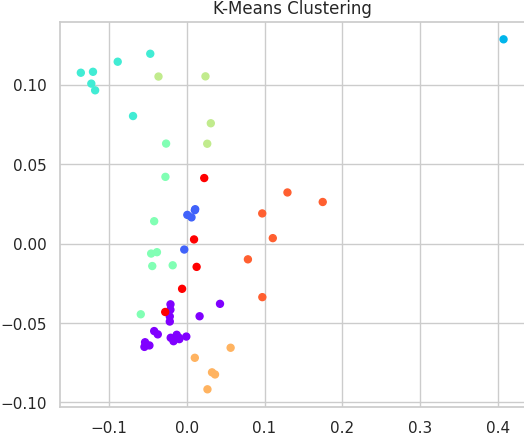

In [32]:
from sklearn.cluster import KMeans
pca = PCA(n_components = 10)
pca.fit(hands)
# transform to reduce the dimension.
x = pca.transform(hands)
# perform the k-means algorithm
kmeans = KMeans(n_clusters = 9, n_init = "auto")
kmeans.fit(x)

data_kmeans = kmeans.predict(x)

plt.figure(figsize=(6, 5))

plt.scatter(x[:, 0], x[:, 1], c = data_kmeans, s=25, cmap='rainbow')
plt.title('K-Means Clustering')
plt.show


Looks kind of clustered...  
We will have to check how correct the division is.  
It seems that we cannot use a heatmap for this, since we do not have the original classification class. Because, as we said above, the classification in our dataset is a video segment to sentence, and not a frame to letter.  
Nevertheless, we can observe and examine some cases in our example and see how correct the clastering is.  
We would like to check a few things:
* First of all, we would like to see that we will indeed get the original sentence, that is: '3 creekhouse'.
* In the first four frames groups, the clasters should be different and unique, because the first four letters in the sentence are different.
* The fourth, fifth and last groups should be the same, as they are all the letter 'e'.


Let's take the labels of the clastering for each frame, by kmeans.labels_

In [33]:
labels = kmeans.labels_
print("clastering labels for the sequence")
print(labels)

clastering labels for the sequence
[7 7 7 7 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 8 8 8 8 5 5 5 5 3 3 3 3 3 3 3
 4 4 4 1 1 1 1 1 4 4 4 4 4 6 6 6 6 6 7 7 2]


Looks nice. We have almost everything seperate into groups.
Let's try to treat each consecutive group as a single value. A type of frame compression into one image.

In [34]:
cluster_phrase = []
# take one for a group of equal clusters numbers, if we have only one frame in a group - ignore.
for i, element in enumerate(labels):
    if (i == 0 or element == labels[i-1]) and (i == len(labels)-1 or element != labels[i+1]):
        cluster_phrase.append(element)
        

print("After frame compression into one image")
print(cluster_phrase)

After frame compression into one image
[7, 0, 8, 5, 3, 4, 1, 4, 6, 7]


We would like to build a map in which there will be a 'translation' of each number from cluster_phrase to the letter to which it is translated.  
So we will take the first sequence of the cluster_phrase list in which the letters are unique, and compare it to the first sequence in the original phrase.  
Once we have built a translation map for unique letters, we can translate the entire original string and see how correct the clustering was indeed.

In [35]:
unrepeated_cluster_str = ""

for value in cluster_phrase:
    value = str(value)
    if value not in unrepeated_cluster_str:
        unrepeated_cluster_str += value
    else:
        break

print(f"The unrepeated clustered string: {unrepeated_cluster_str}")



unrepeated_phrase = []

for char in phrase.replace(" ",""):
    if char not in unrepeated_phrase:
        unrepeated_phrase.append(char)
    
# Convert to string
unrepeated_phrase_str = ''.join(unrepeated_phrase)
# Take th subtext, to be the same length as the clusterd string
subtext =  unrepeated_phrase_str[:(len(unrepeated_cluster_str))]

print(f"The unrepeated phrase: {subtext}")

The unrepeated clustered string: 7085341
The unrepeated phrase: 3crekho


Now, we will build the translate table from clasters numbers to letters by using this two string above and with the str.maketrans function, in order to use the str.translate() to perform character-based  translations in a string.  
It should be noted that when we have two consecutive identical letters, they will appear as a single sequence. Therefore we will check the correctness on the string without repetitions.

In [36]:
translate_table = str.maketrans(unrepeated_cluster_str, subtext)

# Let's take the clustered full list and convert to string
cluster_str = [str(value) for value in cluster_phrase]
cluster_str = ''.join(cluster_str)

# Now we can translate the cluster_str with the translate table we build
coded_str = cluster_str.translate(translate_table)

# Get the phrase without a sequence of identical letters
phrase_no_seq = []
for i in range(len(phrase)):
    char = phrase[i]
    if char != ' ' and (i == len(phrase)-1 or char != phrase[i+1]):
        phrase_no_seq.append(char)

phrase_no_seq_str = ''.join(phrase_no_seq)

print(f"We need to get: {phrase_no_seq_str}")
print(f"We got: \t{coded_str}")


We need to get: 3crekhouse
We got: 	3crekhoh63


Quite successful.  
Let's use a confusion matrix to show the correctness of the clustering.

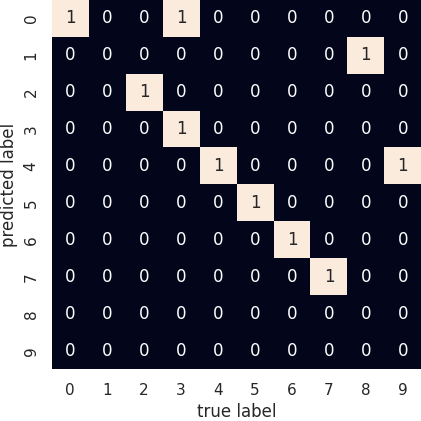

In [37]:

from sklearn.metrics import confusion_matrix
phrase_list = [char for char in unrepeated_phrase_str]
# For confusion matrix, arrange to be the same length
coded_list = [char for char in coded_str]

mat = confusion_matrix(phrase_no_seq, coded_list)

sns.heatmap(mat.T, square=True, annot=True, cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

All in all, the beginning of the string is classified fine.
Only the ending went wrong
It is interesting to check if there is a similarity in the hand signs between the original letters and the letters to which they were classified.
In fact, we did not find any similarity, but the root of the error is actually the fact that our data consist of frames.  
it is possible that a group of frames belonging to one letter marking, split into several letter markings and caused a disturbance.  
This makes sense, because there are frames of transition between letters that can be identified as another letter.  
After all, the goal was relatively successful.  
We consider turning this example into general functions, in order to produce a model for all the data.

# Model of K-means
We notice that the .translate method appears to sometimes double translate the coded list - if the first group is a 3 that translates to a 2, but we later make 2 tranlsate to g we get a g in both places.  
This in mind we write a more strict translation algorithm that will perform more slowly, but much more accurate.

In [4]:
def strict_translate(encoded_list,  known_letters , debug:bool = False):
    my_encoded_list = encoded_list.copy()
    encoded_fragment = [str(element) for element in my_encoded_list[:len(known_letters)].copy()]
    
    for find, replace in zip(encoded_fragment,known_letters):
        for i,element in enumerate(my_encoded_list):
            if not isinstance(element, str) and str(element) == find:
                if debug:
                    print(f"replacing {element} with {replace}")
                    
                my_encoded_list[i] = replace
    
    decoded_text = ''.join([str(element) for element in my_encoded_list])
    return decoded_text

We will write the clustering process in a general way with parameters.  
When each time we would like to print also the similarity of the clustering result vs the original.

In [2]:
import pandas as pd
import numpy as np
import pyarrow.parquet as pq
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
from pathlib import Path

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import normalize


In [5]:

def try_clustering(sample_id: int, train_df : pd.DataFrame, savethreshold = 80):
        #get the text that's being signed
        phrase_string = train_df.loc[train_df["sequence_id"] == sample_id].phrase.values[0]
        
        filename = train_df.loc[train_df["sequence_id"] == sample_id].file_id.values[0]
        
        #get the video itself
        target_phrase = pd.read_parquet(f"/kaggle/input/asl-fingerspelling/train_landmarks/{filename}.parquet").loc[sample_id]
        
        # delete everything but the detected hand, and the frame number
        hand = target_phrase.filter(regex="hand").copy().dropna(axis=1,how="all")
        
        # remove frames where there's very few hand points detected
        hand = hand.dropna(axis=0,thresh=20)
        
        #find the dimensionality of the dataset:
        feat = hand.filter(regex="hand").to_numpy()
        feat = normalize(np.nan_to_num(feat))
        n_components = min(feat.shape)
        pca  = PCA(n_components=n_components)
        pca.fit(feat)

        explained_variance = pca.explained_variance_
        
        # work out a cut-off threshold for PCA  - the last dimension that matters.
        # We selected the dimension that contributes 1% as much information as the first one - or all n_components if that fails.
        n_components = next((i for i, dimension in enumerate(explained_variance) if dimension / explained_variance[0] <= 0.01), n_components)

        pca = PCA(n_components=n_components)
        pca.fit(feat)
        x = pca.transform(feat)
        
        # find unique letters (less one for " " space)
        unique_letters = len(set(phrase_string)) -1 
        
        kmeans = KMeans(n_clusters=unique_letters,n_init="auto")
        try:
        
            kmeans.fit(x)
        except:
            # most likely there's not enough "non-blank" frames to cluster them into letters - that means the video should probably be discarded
            return 0, None
        
        cipher = []
        
        #let's only keep labels found in consecutive detections - discarding others as noise
        for i, element in enumerate(kmeans.labels_):
            if len(cipher) == 0 or (i+1 < len(kmeans.labels_) and element == kmeans.labels_[i+1] and element != cipher[-1]):
                cipher.append(element)

        cipherstr = [str(element) for element in cipher]
        
        unique_string = ""
        for value in cipherstr:
            if value not in unique_string:
                unique_string += value
            else:
                break
        
        unrepeated_phrase = no_repeats(phrase_string.replace(" ",""))
        
        plain_subtext =  unrepeated_phrase[:(len(unique_string))]
        
        
        decoded_word = strict_translate(cipher,plain_subtext)
        
        #print(f"The k-means labels: {kmeans.labels_}")

        print(f"We're supposed to get: {unrepeated_phrase}")
        print(f"We got:                {decoded_word}")
        
        this_sim = similarity(unrepeated_phrase,decoded_word)
        
           
        print(f"This is a { this_sim : .2f}% similarity.")
        
        if this_sim >= savethreshold:
            cluster_df = save_gestures(hand,kmeans.labels_,cipher,unrepeated_phrase,decoded_word,sample_id)
            return this_sim, cluster_df
        else:
            return this_sim, None
        
def no_repeats(text: str): # removes consecutive repeated letters
    return "".join(dict.fromkeys(text))

def similarity(string1 : str, string2 : str):
    hits = 0
    for i, let in enumerate(string1):
        try:
            if string2[i] == let:
                hits += 1
        except:
            ... # the two strings are not the same length, so there's no "hit" in this context
    
    return 100 * hits / len(string1)

We will use the clustering model in such a way that for each frame that is correctly classified by the K- means, we will save it in a general data frame with the letter to which it was classified.  
At the end of the process we will output the general data frame that contains all the frames with the letters.  
We can then run a basic neural network model When we refer to the data as extracted images with a target class of the english letters.  
With the help of this model we can classify a video clip into text, with the help of extracting the frames and classifying them into English letters. Then we will take each group that has the same letters and represent it as a single letter. This way we can represent the complete sentence.

In [6]:
def save_gestures(hand_df,groups,cipher, unrepeated_phrase,decoded_word,sequence_id):
    
    cluster_df = pd.DataFrame()
    for i, letter in enumerate(unrepeated_phrase):
        if i < len(decoded_word) and letter == decoded_word[i]:
            cluster = cipher[i]
            #print(f"Letter: {letter}, Cluster: {cluster}")
            
            
            #print(f"cluster: {cluster}")
            for i,group in enumerate(groups): # group - number of cluster, i= num of group
                #print(f"i: {i}")
                #print(f"group: {group}")
                flag = False
                
                if group == cluster:
                    flag = True
                    
                    res = hand_df.iloc[i]
                    #res = res.drop(labels=['frame'])  # Create a new Series without the 'frame' column
                    
                    res['letter'] = letter
                    
                    #print(res)
                    res = res.to_frame().T  # Transpose to make it a row

                    # Concatenate the new DataFrame with the empty DataFrame
                    cluster_df = pd.concat([cluster_df, res], ignore_index=True)
                else:
                    if flag == True:
                        break
    
    return cluster_df

We will run the model on some of the data, and take samples as the number of n_samples,  
we will define a similarity_threshold parameter that will represent the similarity threshold for which we will use the sequence for the final data frame.  
We will save the results in the frames_df database.  
Finally, we will print the average correctness of the classification.

In [7]:
n_samples = 20

similarity_threshold = 40
cumulative_similarity = 0

frames_df = pd.DataFrame()

for sequence in train_df.head(n_samples).sequence_id:
    
    print(f"Sequence ID: {sequence}")
    
    sim, res_df = try_clustering(sequence, train_df,similarity_threshold)
    cumulative_similarity += sim
    frames_df = pd.concat([frames_df, res_df], ignore_index=True)
    

print(f"Average Similarity was: {cumulative_similarity/n_samples : .2f}%")


Sequence ID: 1816796431
We're supposed to get: 3crekhous
We got:                3crekhorc6
This is a  77.78% similarity.
Sequence ID: 1816825349
We're supposed to get: scale/kuhy
We got:                scals2358c
This is a  40.00% similarity.
Sequence ID: 1816909464
We're supposed to get: 138wilamner
We got:                138w839105181805168981868105103
This is a  36.36% similarity.
Sequence ID: 1816967051
We're supposed to get: 98franklie
We got:                98franklkan3
This is a  80.00% similarity.
Sequence ID: 1817123330
We're supposed to get: 6920northeas1d
We got:                6921311135123113128630271381101243114
This is a  21.43% similarity.
Sequence ID: 1817141095
We're supposed to get: w.fremnjp
We got:                w.w427.04340436
This is a  22.22% similarity.
Sequence ID: 1817169529
We're supposed to get: htps:/ji.ukoa
We got:                htpsp2ps9sp2726h8298s918176htp9pt1081014
This is a  30.77% similarity.
Sequence ID: 1817171518
We're supposed to get: 23961sto

# MLPClassifier
We would like to train a basic model of neural networks on the data we arranged above. Split into X and Y as source and target.  
Normalized to use neural networks.  
Split into train and test.  
Le'ts run a basic MLPClassifier model when there is one intermediate layer with 100 perspertons. We will set alpha to be 1 because we tried several times but the model tended to overfit.

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import MinMaxScaler

In [9]:
scaler = MinMaxScaler()
frames_df = frames_df.fillna(0)
x = frames_df.filter(like='hand', axis=1)
y = frames_df['letter']
# normalization
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 0)

In [11]:
from sklearn.neural_network import MLPClassifier 
mlp_model = MLPClassifier(hidden_layer_sizes = [100],
                      alpha = 1,
                      solver='lbfgs',
                      random_state = 0,
                      max_iter = 10000).fit(X_train, y_train)

We will print the prediction results of the model in several forms.
Accuracy parameters as a matrix, confusion matrix for the classification of the English letters and also all the classified letters.

Final Loss: 0.8582
Accuracy: 0.86
Classification Report:
               precision    recall  f1-score   support

           +       0.82      1.00      0.90         9
           -       0.92      0.85      0.88        13
           1       1.00      1.00      1.00         2
           2       1.00      0.50      0.67         2
           3       0.50      1.00      0.67         1
           4       1.00      0.67      0.80         3
           5       1.00      0.89      0.94         9
           6       0.88      1.00      0.93         7
           8       0.67      1.00      0.80         2
           9       0.83      0.83      0.83         6
           a       0.73      1.00      0.84         8
           c       0.93      1.00      0.96        13
           e       0.60      1.00      0.75         3
           f       1.00      0.67      0.80         3
           h       1.00      0.67      0.80         3
           i       1.00      1.00      1.00         2
           k       0.50

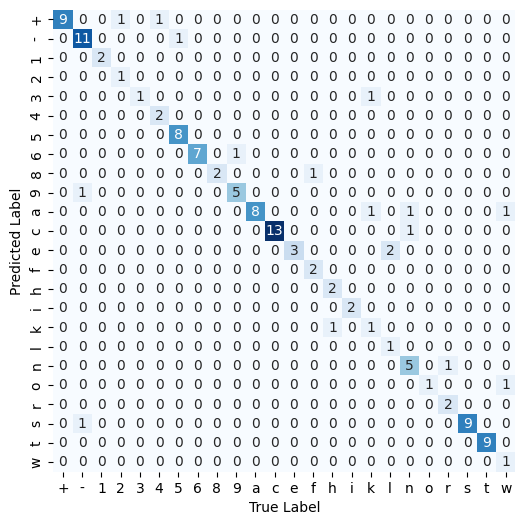

In [14]:
# Access loss from the model
final_loss = mlp_model.loss_
print(f"Final Loss: {final_loss:.4f}")

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on the test data
y_pred = mlp_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print a classification report
report = classification_report(y_test, y_pred, zero_division=1)
print("Classification Report:\n", report)

# Display a confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
#plt.figure(figsize=(8, 6))
#sns.heatmap(confusion_mat.T, square=True, annot=True, fmt='d', cbar=False, cmap='Blues')
#plt.xlabel('True Label')
#plt.ylabel('Predicted Label')
#plt.show()

labels = sorted(y.unique())  # Get unique letters and sort them
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat.T, square=True, annot=True, fmt='d', cbar=False, cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.show()


In [22]:
print(mlp_model.score(X_train, y_train)) 
print(mlp_model.score(X_test, y_test)) 

0.9703504043126685
0.8629032258064516


As you can see the accuracy is relatively high in the classification. Total accuracy 0.86 and relatively no overfitting, it must be taken into account that this is not on all the DATA we have, since we only wanted to look at it from above as a base model. All in all a relatively nice success.  
Now we would like to arrange the data in a good way and access the training of a model intended for video.


As you can see, the accuracy results are very high, that's why the CONFUSION MATRIX gets its diagonal shape - that is, most of the letters are predicted exactly as they are.
It seems that throughout the matrix there are predicts that were wrong and they are not like the original, most of them are single (1).

We will try to see by SHAP values which features have the most impact on the classify decision.
Since we have a lot of classification classes, we will content ourselves with looking at the SHAP values of only one of the classes.  
Then, later on, we will observe the SHAP values again, but this time we will do it on the embeddings of the mlp model learning process. By comparing the two we will see the progress and learning process of the model.

Permutation explainer: 125it [00:43,  2.23it/s]                         
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


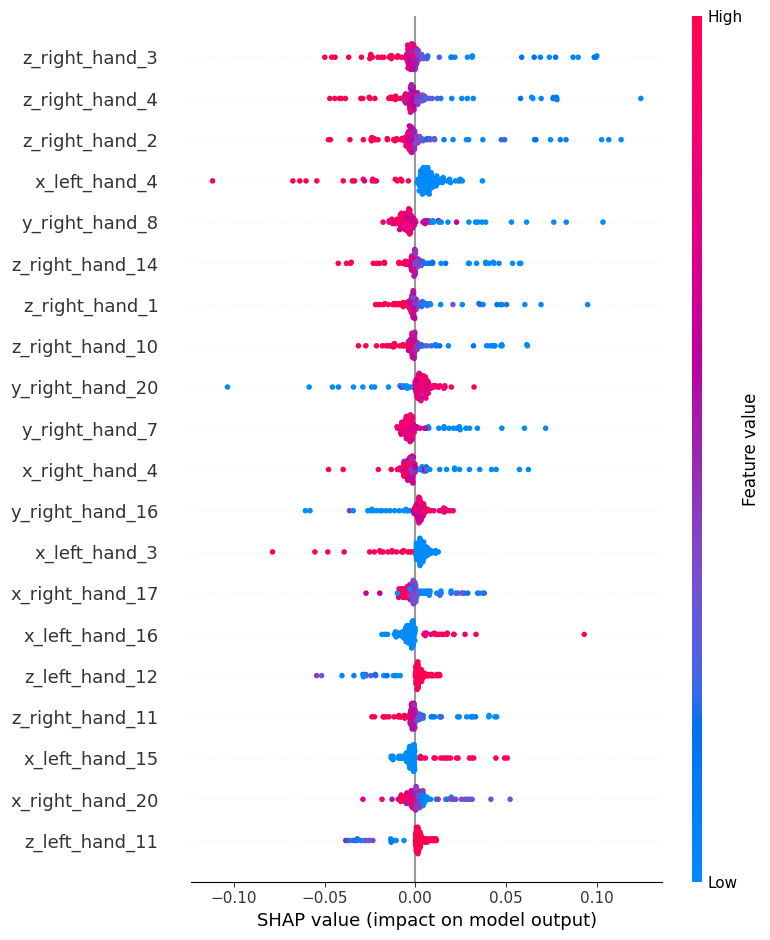

In [31]:
import shap
from sklearn.neural_network import MLPClassifier

# Wrap the model with a function that takes a single input and returns the prediction
def model_predict(input_data):
    return mlp_model.predict_proba(input_data)[:, 1]  # Example one class

# Use SHAP to explain the model's predictions
explainer = shap.Explainer(model_predict, X_train)
shap_values = explainer.shap_values(X_test)

# Summarize the effects of all the features
shap.summary_plot(shap_values, X_test)

We will make this visual explanation later after checking the embddings, where we will expand on the visual and compare the two of them.

# The investigation of the model after its training
We would like to investigate and check what the mlp model learned.  
We will take the embeddings landmark from the hidden_layer of the neural network and run on them again PCA to reduce dimension in order to run k-means classifier.  
We want to see what the process of the model during training.    
We would like to visualize the contribution of each feature to the model's classification decision.    
We will use the idea of SHapley Additive exPlanations function with a summary plot:  
SHAP summary plot is a visualization that helps to understand the impact of different features on the output of a model.  
In our case, after performing K-means we will show the feature contributions to each data point's cluster assignment.  
We will see and investigate the results.

First, we will perform K-means on the information processed during the neural network

In [29]:
hidden_layer_weights = mlp_model.coefs_[0]  # Coefficients of the first hidden layer
embeddings = hidden_layer_weights
target_data = mlp_model.classes_

#len(target_data) = 28

# get the current minimum dimension 
n_components = min(embeddings.shape)
pca  = PCA(n_components = n_components)
pca.fit(embeddings)
explained_variance = pca.explained_variance_

        
n_components = next((i for i, dimension in enumerate(explained_variance) if dimension / explained_variance[0] <= 0.01), n_components)
pca = PCA(n_components=n_components)
print(f'number of components: {n_components}')
pca.fit(embeddings)
x = pca.transform(embeddings)



# perform the k-means algorithm
kmeans = KMeans(n_clusters = 28, n_init = "auto")
kmeans.fit(x)

data_kmeans = kmeans.predict(x)



number of components: 19


Now we will produce several types of visualizations that will illustrate the importance of each feature among the features (after dimension reduction).  
  
SHAP values are typically used for explaining the output of complex models, and they rely on having a model that takes input features and produces predictions. K-means clustering, on the other hand, is an unsupervised learning algorithm that assigns data points to clusters based on their similarity.
Therefore, in order to export a corresponding visual SHAP values we will do it manually. First of all, we will start with two preliminary visuals that will split the components of the SHAP values and then we will arrive at the total visual of the SHAP values.  
  
In the next visual, we will see a graph in which it will be shown for each cluster, that is, for each letter into which it is possible to classify, what is the average value for each attribute from the processed attributes after dimension reduction.

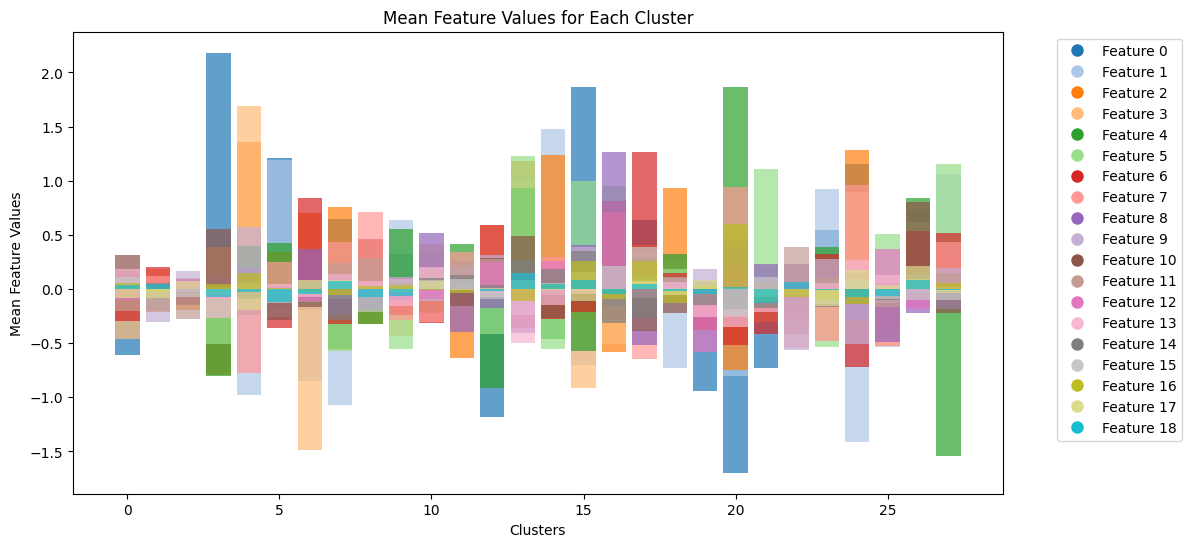

In [42]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

cluster_df = pd.DataFrame(x, columns=[f"Feature {i}" for i in range(x.shape[1])])
cluster_df['Cluster'] = data_kmeans

# Calculate the mean values for each feature within each cluster
cluster_means = cluster_df.groupby('Cluster').mean()

# Get a list of unique features
unique_features = cluster_df.columns[:-1]

# Create a color map for each feature using a contrast colormap
cmap = plt.get_cmap('tab20')
feature_colors = {feature: cmap(i / len(unique_features)) for i, feature in enumerate(unique_features)}

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

# Iterate over each feature and plot a bar for each cluster with a unique color
for i, feature in enumerate(unique_features):
    color_values = cluster_df[feature].values
    for cluster, color_value in zip(cluster_means.index, color_values):
        ax.bar(cluster, cluster_means.loc[cluster, feature], color=feature_colors[feature], alpha=0.7)

# Set labels and title
ax.set_xlabel('Clusters')
ax.set_ylabel('Mean Feature Values')
ax.set_title('Mean Feature Values for Each Cluster')

# Create a custom legend with unique colors for each feature
legend_labels = [plt.Line2D([0], [0], marker='o', color='w', label=feature, markersize=10, markerfacecolor=feature_colors[feature]) for feature in unique_features]
ax.legend(handles=legend_labels, loc='upper right', bbox_to_anchor=(1.2, 1.0))

plt.show()

Let's now look at a similar visual, only where, for each feature we will see what its average number in each cluster.  
Each cluster gets a different color, and we can see the average numbers of the features.

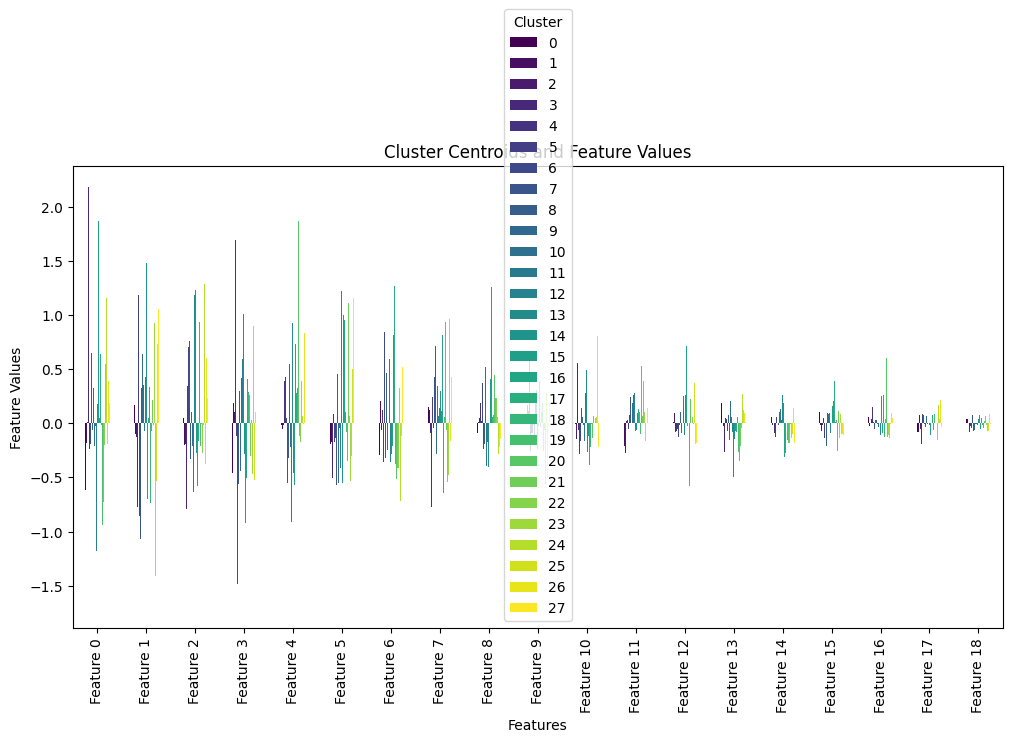

In [34]:
cluster_df = pd.DataFrame(x, columns=[f"Feature {i}" for i in range(x.shape[1])])
cluster_df['Cluster'] = data_kmeans

# Calculate the mean values for each feature within each cluster
cluster_means = cluster_df.groupby('Cluster').mean()

# Visualize the cluster centroids
cluster_means.T.plot(kind='bar', figsize=(12, 6), colormap='viridis')
plt.title('Cluster Centroids and Feature Values')
plt.xlabel('Features')
plt.ylabel('Feature Values')
plt.show()

Let's look for example at the first feature, you can see that there are clusters where the average value of this feature is almost the same, but since the contrast between the values of the feature is large and ranges from 2.5 to -0.6, this will be a feature that greatly influences the classification into one class or another.  
As we go along the features in the diagram, it seems that the values of the features are getting smaller and smaller to a very limited range, which means that these features do not have such a relative effect on the classification into one class or another.  
It's a shame that we can't know exactly which feature it is among our 126 features, since we used dimension reduction - as if we treated the data as an image, and we won't know which features we're left with.

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


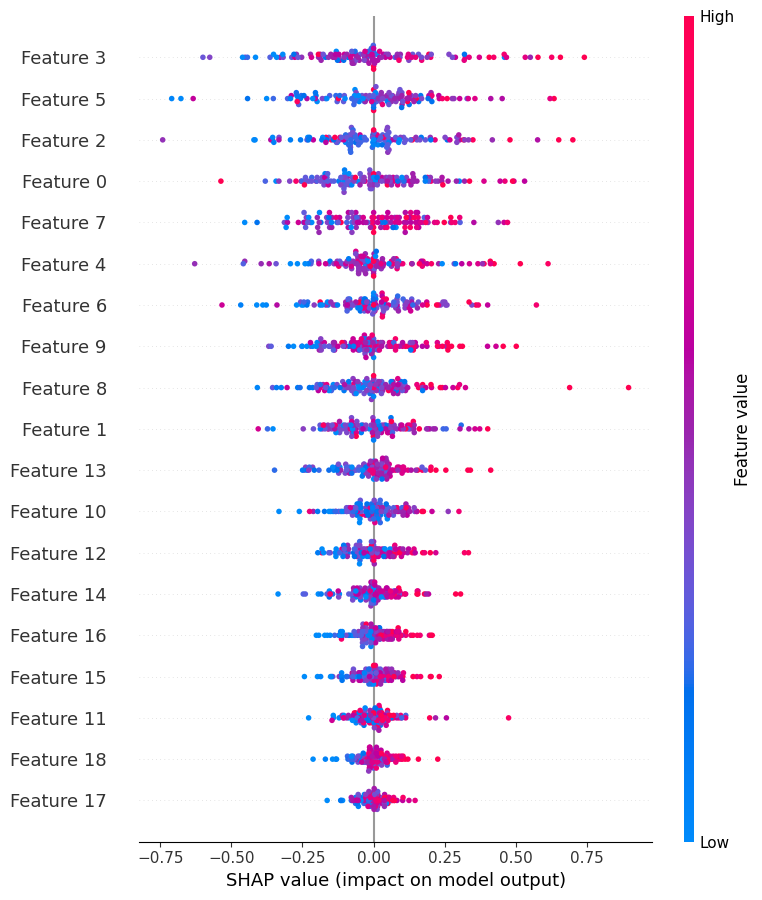

In [35]:
import shap
# Create synthetic data to understand feature influence
synthetic_data = kmeans.cluster_centers_

# Compute the difference between data points and cluster centers
feature_influence = x - np.array([synthetic_data[i] for i in data_kmeans])

# Create a SHAP-like summary plot to visualize feature influence
shap.summary_plot(feature_influence, x, feature_names=[f"Feature {i}" for i in range(n_components)], title="Feature Influence on K-means Clustering")

# Analyze the feature influence and draw conclusions

So here we are at the end of the overall visual.  
Let's explain this visual graph:  
Each vertical bar represents a feature. The length of the bar indicates the size of the feature's contribution to the model output. Positive values push the model output toward a higher cluster, while negative values push it toward a lower cluster.  
The colors represent the feature values. Warmer colors typically indicate higher feature values, while cooler colors indicate lower feature values. 
The horizontal axis represents the SHAP values, which quantify the impact of each feature on the model output.  
The SHAP values are centered around 0. Positive values push the output towards a higher cluster, while negative values push it towards a lower cluster.  
Each point in the plot corresponds to a data point in our dataset.  
The vertical position of a point along a feature's bar represents the SHAP value for that feature for that specific data point.  
Points higher on the plot contribute more to the higher cluster assignments, and points lower on the plot contribute more to the lower cluster assignments.  
  
This graph sort of connects the two graphs above, by the space of the points we will know how much the attribute affects the classification and by the color we will know the value of the attribute at each point in the data.  
In this model we calculated the manual SHAP values as the difference of each point from the center of the cluster to which it belongs. The names of the features were taken according to the order of the n_components of the PCA of the dimension reduction.  

Now for comparison,  
Note that this is the graph that expresses the learning process of the model, compared to the previous graph in which it shows the final results of the model.
Indeed, if we look carefully, we can see that the effect on the learning process is still not clear-cut, and rather extends along the entire length of the graph. In general it seems that low values affect a lower cluster and high values affect a higher one. On the other hand, in the graph of the final results you can see a sharper separation of the data, where in general, high values affect a lower cluster / classification and even this is not always. For example the attribute y_right_hand_20 has the opposite effect, the lower the values, the lower the classification. It is indeed possible to see the learning process of the model, how from a slight and unequivocal effect, throughout the training process the effect becomes sharp and unequivocal!

We will move from the long and instructive process of the EDA to the process of cleaning and arranging the data based on the conclusions we gathered along the way.

# Write the dataset to TFRecords files
We consider minimal editing of deleting columns and merging the CSV file with the video files.  
So, we will want to write our data files into a new file. As we said above, in order to change the files, we must convert them into a file that allows changes and quick writing.  
in the TFRecords file we can process the data, make changes, and then save those changes. The process typically involves reading the records, performing our desired operations, and then writing the modified data back to a new or the same TFRecords file.  
  
TFRecords files are used to store sequences of binary records. Each record contains a series of features, which can be either scalar values, vectors, or even more complex structures like images. The binary format of TFRecords files is designed for efficient reading and writing, which is especially beneficial when working with large datasets like ours that don't fit entirely in memory.

We will explain the hierarchy of the TFRecord file to which we convert the data:  
Each TFRecord file contains a number of records, where each record contains features that can be extracted.  
We converted the perquet files to TFRecord as follows:

* Each record is for a separate sequence - phrase. This way we will achieve complete separation for each video segment and its classification into an English sentence. In the same way, we can later transpose the least dominant hand in each phrase separately - to reach the maximum level of accuracy.
* In each record as mentioned there are featers, in our case these are of course the FEATER_COLUMNS of the hand signs, and in addition it will contain the classification column - phrase.
* Tensors can be extracted from each record, thus extracting the FEATER_COLUMNS separately next to the phrase separately.  
    We can send the extracted tensors to training models.

In [27]:
import shutil
import tensorflow as tf
from tqdm.notebook import tqdm

In [28]:

# make a new directory to store the new data files the folder name preprocessed
# if it is not the first time - delete the directory and build again. 
if not os.path.isdir("preprocessed"):
    os.mkdir("preprocessed")
else:
    shutil.rmtree("preprocessed")
    os.mkdir("preprocessed")
    
# Loop through each file_id
# tqdm - in order to see visualization of the progress
for file_id in tqdm(train_df.file_id.unique()):
    # Parquet file name
    pq_file = f"/kaggle/input/asl-fingerspelling/train_landmarks/{file_id}.parquet"
    # Filter train.csv and fetch entries only for the relevant current file_id
    file_df = train_df.loc[train_df["file_id"] == file_id]
    # Fetch the parquet file
    # take only the necessary columns from the perquet file.
    parquet_df = pq.read_table(f"/kaggle/input/asl-fingerspelling/train_landmarks/{str(file_id)}.parquet",
                              columns=['sequence_id'] + FEATURE_COLUMNS).to_pandas()
   
          
    # convert to numPy array in order to do arithmetic 
    parquet_numpy = parquet_df.to_numpy()
    
    # File name for the updated data
    tf_file = f"preprocessed/{file_id}.tfrecord"
    
    # a pointer to each tfrecord file.
    with tf.io.TFRecordWriter(tf_file) as file_writer:
        
        # Loop through each sequence - phrase in file.
        # There are many seq in file_df
        for seq_id, phrase in zip(file_df.sequence_id, file_df.phrase):
            # for the current seq fetch the data:
            # Fetch sequence data
            frames = parquet_numpy[parquet_df.index == seq_id]
            
            # Calculate the number of NaN values in each hand landmark
            r_nonan = np.sum(np.sum(np.isnan(frames[:, RHAND_IDX]), axis = 1) == 0)
            l_nonan = np.sum(np.sum(np.isnan(frames[:, LHAND_IDX]), axis = 1) == 0)
            no_nan = max(r_nonan, l_nonan)
            
            # Take only sequences with an amount of no-nan frames larger then length of phrase 
            if 2*len(phrase) < no_nan:
                
                # take only the FEATURE_COLUMNS
                features = {FEATURE_COLUMNS[i]: tf.train.Feature(
                float_list=tf.train.FloatList(value=frames[:, i])) for i in range(len(FEATURE_COLUMNS))}

                # a new phrase column:
                features["phrase"] = tf.train.Feature(bytes_list=tf.train.BytesList(value=[bytes(phrase, 'utf-8')]))

                record_bytes = tf.train.Example(features=tf.train.Features(feature=features)).SerializeToString()

                file_writer.write(record_bytes)


  0%|          | 0/68 [00:00<?, ?it/s]

# Parse data from TFRecord file
After saving the data as TF files, we will of course want to extract them in order to transfer them to a training model as parts. So we will create a function to extract the data.  
This function reads a single serialized record data and convert it to landmark and phrase tensors.

In [29]:
# record_bytes is a variable that represents a single serialized record in the form of bytes

def decode_fn(record_bytes):
    schema = {COL: tf.io.VarLenFeature(dtype=tf.float32) for COL in FEATURE_COLUMNS}
    schema["phrase"] = tf.io.FixedLenFeature([], dtype=tf.string)
    
    # get the features from the record_bytes
    features = tf.io.parse_single_example(record_bytes, schema)
    
    # get the phrase and landmark separetly
    phrase = features["phrase"]
    landmarks = ([tf.sparse.to_dense(features[COL]) for COL in FEATURE_COLUMNS])
    
    # Transpose to maintain the original shape of landmarks data.
    landmarks = tf.transpose(landmarks)
        
    #return tensors of landmarks and phrase
    return landmarks, phrase

# Resizing
Deep learning models, require a consistent input size.  
When feeding our frames tensors into neural networks, it is necessary that all frames will have the same dimensions. So we need to resize our frames to a uniform size.  
  
For exactly the same reason, our target column should also be in the same dimensions.  
Therefore, a fixed size is chosen to which everyone will be adjusted.  
In order to fill in the gaps of smaller phrases, we will fill in with padding value.  
We will add a new characters to our json file, "P" for padding.
  
We will add two additional characters to our vocabulary, SOS and EOS represent the start and end of a sequence, respectively.

In [30]:
import json
with open ("/kaggle/input/asl-fingerspelling/character_to_prediction_index.json", "r") as f:
    char_to_num = json.load(f)

# Add pad character, SOS and EOS represent the start and end of a sequence, respectively.

pad_char = 'P'
sos = '<'
eos = '>'
pad_char_idx = 59
sos_char_idx = 60
eos_char_idx = 61

# number of character 62
CHAR_NUM = len(char_to_num)

char_to_num[pad_char] = pad_char_idx
char_to_num[sos] = sos_char_idx
char_to_num[eos] = eos_char_idx

print(char_to_num)


{' ': 0, '!': 1, '#': 2, '$': 3, '%': 4, '&': 5, "'": 6, '(': 7, ')': 8, '*': 9, '+': 10, ',': 11, '-': 12, '.': 13, '/': 14, '0': 15, '1': 16, '2': 17, '3': 18, '4': 19, '5': 20, '6': 21, '7': 22, '8': 23, '9': 24, ':': 25, ';': 26, '=': 27, '?': 28, '@': 29, '[': 30, '_': 31, 'a': 32, 'b': 33, 'c': 34, 'd': 35, 'e': 36, 'f': 37, 'g': 38, 'h': 39, 'i': 40, 'j': 41, 'k': 42, 'l': 43, 'm': 44, 'n': 45, 'o': 46, 'p': 47, 'q': 48, 'r': 49, 's': 50, 't': 51, 'u': 52, 'v': 53, 'w': 54, 'x': 55, 'y': 56, 'z': 57, '~': 58, 'P': 59, '<': 60, '>': 61}


In [31]:
FRAME_LEN = 128
# Function to resize and add padding.
# Get a landmak tensor x
def resize_pad(x):
    # if number of entries < frame_len: pad the space with zeroes
    if tf.shape(x)[0] < FRAME_LEN:
        # pad only the first dimension - the rows.
        # The third dimension is for tf.newaxis - in order to resize 2D image
        x = tf.pad(x, ([[0, FRAME_LEN-tf.shape(x)[0]], [0, 0], [0, 0]]))
    else:
        # resize to a length to FRAME_LEN, and leave the width as it is.
        x = tf.image.resize(x, (FRAME_LEN, tf.shape(x)[1]))
    return x

# Preprocess functions
### One hand only
As we mention before, we would like to stay with coordinates of one hand only. we choose in each record, the dominant hand.  
In addition, we will transport all the coordinates into right-hand coordinates, thus facilitating our training model.  
So, if the right hand is the dominant hand, we choose the right hand as the only hand in this record. if the left hand is the dominant hand, we choose the left hand as the only hand in this record and we will transport the left coordinats to be right coordinats, by transporting the x-axis.
In summary after the process of each record / landmark tensor, we will have much more clean view of the hand landmark.
### Normalization
In order to improve the convergence and performance of our training model algorithms, we would like all the coordinates to be normalized.  
We will do this using the following standardization formula:  
x = (x- mean) / std\
This type of normalization is used to scale the data so that it has zero mean and  unit (1) standard deviation.  
It can be useful in various machine learning tasks to ensure that the features are on a similar scale.
### Resizing
In order to use neural network models, the input that enters the model should be of the same size.
Therefore, we will have to initialize the size of the data to a certain fixed size.  
We need to resize the tensors, so we need to prepare the data for tf.image.resize() operation.  
The tf.image.resize() is a smart method for resizing image like tensors.  
Our data is based on images - frames, but because the featers are extracted, we have only two dimensions.  
In order to use tf.image.resize() method, we need at least 3 dimensions.
The technique to manipulate the dimensions of tensors is the use tf.newaxis.

This function process a landmark tensor and apply the above details.

In [32]:

# Detect the dominant hand from the number of NaN values.
# Dominant hand will have less NaN values since it is in frame moving.
# x is a tensor in-memory data structures used during computation
def pre_process(x):
    
    rhand = tf.gather(x, RHAND_IDX, axis=1)
    lhand = tf.gather(x, LHAND_IDX, axis=1)
    
    # build a binary array for 0 to NaN and 1 to not NaN
    # checks for each entry, if there is at least one True value(NaN) -> nan_idx = true
    # true mean NaN Entry
    rnan_idx = tf.reduce_any(tf.math.is_nan(rhand), axis=1)
    lnan_idx = tf.reduce_any(tf.math.is_nan(lhand), axis=1)
    
    # counts the number of True entries (since True is treated as 1 and False is treated as 0)
    # count the amount of nan entries in each hand
    rnans = tf.math.count_nonzero(rnan_idx)
    lnans = tf.math.count_nonzero(lnan_idx)
    
    # if lhand is dominant -> transport the coordinates
    # For dominant hand
    if rnans > lnans:
        
        # left hand is the dominant - less nan entries.
        hand = lhand
        # get the right hand columns - transform them:
        # part the RHAND_IDX to 3, to get the index for x,y,z:
        
        hand_x = hand[:, 0*(len(LHAND_IDX)//3) : 1*(len(LHAND_IDX)//3)]
        hand_y = hand[:, 1*(len(LHAND_IDX)//3) : 2*(len(LHAND_IDX)//3)]
        hand_z = hand[:, 2*(len(LHAND_IDX)//3) : 3*(len(LHAND_IDX)//3)]
        
        # Concat them after transpose
        # Transpost hand_x - only the X axis need to transpost to be a right-hand coordinat.
        hand = tf.concat([1- hand_x, hand_y, hand_z], axis=1)
        
        
        
        # 'hand' hold only one hand coordinates.
        
    # if rhand is dominant -> do not need to transport the coordinates.                      
    else:
        
        # right hand is the dominant - less nan entries.
        hand = rhand
        # for test
        #print("Only right hand")
        #print(hand)
    
    # Take the process hand, and add a NEW DIMENSION in order to resize.
    hand_x = hand[:, 0*(len(LHAND_IDX)//3) : 1*(len(LHAND_IDX)//3)]
    hand_y = hand[:, 1*(len(LHAND_IDX)//3) : 2*(len(LHAND_IDX)//3)]
    hand_z = hand[:, 2*(len(LHAND_IDX)//3) : 3*(len(LHAND_IDX)//3)]
    
    hand = tf.concat([hand_x[..., tf.newaxis], hand_y[..., tf.newaxis], hand_z[..., tf.newaxis]], axis=-1)
    
    # for test
    #print("After add new axis")
    #print(hand)
    
    # Normalization
        
    # get the mean of each entry - axis 1
    mean = tf.math.reduce_mean(hand, axis=1)[:, tf.newaxis, :]
    # get the standard deviation of each entry - axis 1
    std = tf.math.reduce_std(hand, axis=1)[:, tf.newaxis, :]
    # Convert mean and std to 2D vectors - [:, tf.newaxis, :]
    
    # The Normalization formula
    hand = (hand - mean) / std
    # for test
    #print("After normalization")
    #print(hand)
    
    x = hand
    # Process the size
    x = resize_pad(x)
    # for test
    #print("After resize")
    #print(x)
    
    # Replace NaN values with 0
    x = tf.where(tf.math.is_nan(x), 0.0, x)
    
    # After resize, reshape to orginal prespectives.
    x = tf.reshape(x, (FRAME_LEN, len(LHAND_IDX)))
    
    return x
 

# Vectorization
When we are working with machine learning models, we need to convert textual data, which is represented as strings, into numerical vectors.  
We need to vectorize the phrase data.
In our dataset we have a 'character_to_prediction_index.json' file that contains a character and its integer value.  
We will use it for the vectorization.  
  
This function vectorizes the phrase using character_to_prediction_index.json. and also apply the preprocess function on the landmark tensor

In [33]:

# Build hashTable to store key- value pares of char to num convert
table = tf.lookup.StaticHashTable(
    initializer=tf.lookup.KeyValueTensorInitializer(
        keys=list(char_to_num.keys()),
        values=list(char_to_num.values()),
    ),
    default_value=tf.constant(-1),
    name="class_weight"
)

# Get landmark tensor and phrase tensor
# Process both tensors
def convert_fn(landmarks, phrase):
    
    # Add start and end characters to phrase.
    phrase = sos + phrase + eos
    # Split the phrase to character / bytes: each char = one byte.
    phrase = tf.strings.bytes_split(phrase)
    # Convert characters to numerical values 
    phrase = table.lookup(phrase)
    
    # Vectorize and add padding.
    phrase = tf.pad(phrase, paddings=[[0, 64 - tf.shape(phrase)[0]]], mode = 'CONSTANT',
                    constant_values = pad_char_idx)
    # Apply pre_process function to the landmarks.
    return pre_process(landmarks), phrase

# Split to train and test dataset
In order to pass our dataset to the neural network model, we split the data to train and test. 
Where 80% of the data is for training and 20% for the test.

In [34]:
# get all the tfrecord files
tf_records = train_df.file_id.map(lambda x: f'/kaggle/working/preprocessed/{x}.tfrecord').unique()
batch_size = 64
# split 80% for train
train_len = int(0.8 * len(tf_records))

train_ds = tf.data.TFRecordDataset(tf_records[:train_len]).map(decode_fn).map(convert_fn).batch(batch_size).prefetch(buffer_size=tf.data.AUTOTUNE).cache()
valid_ds = tf.data.TFRecordDataset(tf_records[train_len:]).map(decode_fn).map(convert_fn).batch(batch_size).prefetch(buffer_size=tf.data.AUTOTUNE).cache()

# Transformer model
In our project we need to predict a sentence from a **sequence** of feature vectors.  
We explored what models we can use for this type of data mining.  
We can treat our problem similar to speech recognition. In both cases, we have to predict a sentence from a sequence of data.  
We researched and came up with a [transformer model](https://keras.io/examples/audio/transformer_asr/#callbacks-to-display-predictions) belonging to the Keras library, we found a code for the model and adapted it to our needs.  
The transformer model is a convolutional neural network model for sequence-to-sequence tasks.

# The Input layers

In [35]:
from tensorflow import keras
from tensorflow.keras import layers

In [36]:
class TokenEmbedding(layers.Layer):
    def __init__(self, num_vocab=1000, maxlen=100, num_hid=64):
        super().__init__()
        self.emb = tf.keras.layers.Embedding(num_vocab, num_hid)
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=num_hid)

    def call(self, x):
        maxlen = tf.shape(x)[-1]
        x = self.emb(x)
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        return x + positions


class LandmarkEmbedding(layers.Layer):
    def __init__(self, num_hid=64, maxlen=100):
        super().__init__()
        self.conv1 = tf.keras.layers.Conv1D(
            num_hid, 11, strides=2, padding="same", activation="relu"
        )
        self.conv2 = tf.keras.layers.Conv1D(
            num_hid, 11, strides=2, padding="same", activation="relu"
        )
        self.conv3 = tf.keras.layers.Conv1D(
            num_hid, 11, strides=2, padding="same", activation="relu"
        )
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=num_hid)

    def call(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        return self.conv3(x)

# Encoder layer


In [37]:
class TransformerEncoder(layers.Layer):
    def __init__(self, embed_dim, num_heads, feed_forward_dim, rate=0.1):
        super().__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = keras.Sequential(
            [
                layers.Dense(feed_forward_dim, activation="relu"),
                layers.Dense(embed_dim),
            ]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

# Decoder layer

In [38]:
class TransformerDecoder(layers.Layer):
    def __init__(self, embed_dim, num_heads, feed_forward_dim, dropout_rate=0.1):
        super().__init__()
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm3 = layers.LayerNormalization(epsilon=1e-6)
        self.self_att = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embed_dim
        )
        self.enc_att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.self_dropout = layers.Dropout(0.5)
        self.enc_dropout = layers.Dropout(0.1)
        self.ffn_dropout = layers.Dropout(0.1)
        self.ffn = keras.Sequential(
            [
                layers.Dense(feed_forward_dim, activation="relu"),
                layers.Dense(embed_dim),
            ]
        )

    def causal_attention_mask(self, batch_size, n_dest, n_src, dtype):
        """Masks the upper half of the dot product matrix in self attention.

        This prevents flow of information from future tokens to current token.
        1's in the lower triangle, counting from the lower right corner.
        """
        i = tf.range(n_dest)[:, None]
        j = tf.range(n_src)
        m = i >= j - n_src + n_dest
        mask = tf.cast(m, dtype)
        mask = tf.reshape(mask, [1, n_dest, n_src])
        mult = tf.concat(
            [batch_size[..., tf.newaxis], tf.constant([1, 1], dtype=tf.int32)], 0
        )
        return tf.tile(mask, mult)

    def call(self, enc_out, target, training):
        input_shape = tf.shape(target)
        batch_size = input_shape[0]
        seq_len = input_shape[1]
        causal_mask = self.causal_attention_mask(batch_size, seq_len, seq_len, tf.bool)
        target_att = self.self_att(target, target, attention_mask=causal_mask)
        target_norm = self.layernorm1(target + self.self_dropout(target_att, training = training))
        enc_out = self.enc_att(target_norm, enc_out)
        enc_out_norm = self.layernorm2(self.enc_dropout(enc_out, training = training) + target_norm)
        ffn_out = self.ffn(enc_out_norm)
        ffn_out_norm = self.layernorm3(enc_out_norm + self.ffn_dropout(ffn_out, training = training))
        return ffn_out_norm

# The final Transformer model

This model takes landmark coordinates as inputs and predicts a sequence of characters. The target character sequence, which has been shifted to the left is provided as the input to the decoder during training. The decoder employs its own past predictions during inference to forecast the next token.  
 
In order to know the accuracy of the classification, we will use the Lewinstein distance between strings.  
The string edit distance, quantifies the minimum number of single-character edits (insertions, deletions, or substitutions) required to change one string into the other.  
We will add the print out of the edit dist in addition to the loss index of the model.

In [39]:
class Transformer(keras.Model):
    def __init__(
        self,
        num_hid=64,
        num_head=2,
        num_feed_forward=128,
        source_maxlen=100,
        target_maxlen=100,
        num_layers_enc=4,
        num_layers_dec=1,
        num_classes=60,
    ):
        super().__init__()
        self.loss_metric = keras.metrics.Mean(name="loss")
        self.acc_metric = keras.metrics.Mean(name="edit_dist")
        self.num_layers_enc = num_layers_enc
        self.num_layers_dec = num_layers_dec
        self.target_maxlen = target_maxlen
        self.num_classes = num_classes

        self.enc_input = LandmarkEmbedding(num_hid=num_hid, maxlen=source_maxlen)
        self.dec_input = TokenEmbedding(
            num_vocab=num_classes, maxlen=target_maxlen, num_hid=num_hid
        )

        self.encoder = keras.Sequential(
            [self.enc_input]
            + [
                TransformerEncoder(num_hid, num_head, num_feed_forward)
                for _ in range(num_layers_enc)
            ]
        )

        for i in range(num_layers_dec):
            setattr(
                self,
                f"dec_layer_{i}",
                TransformerDecoder(num_hid, num_head, num_feed_forward),
            )

        self.classifier = layers.Dense(num_classes)

    def decode(self, enc_out, target, training):
        y = self.dec_input(target)
        for i in range(self.num_layers_dec):
            y = getattr(self, f"dec_layer_{i}")(enc_out, y, training)
        return y

    def call(self, inputs, training):
        source = inputs[0]
        target = inputs[1]
        x = self.encoder(source, training)
        y = self.decode(x, target, training)
        return self.classifier(y)

    @property
    def metrics(self):
        return [self.loss_metric]

    def train_step(self, batch):
        """Processes one batch inside model.fit()."""
        source = batch[0]
        target = batch[1]

        input_shape = tf.shape(target)
        batch_size = input_shape[0]
        
        dec_input = target[:, :-1]
        dec_target = target[:, 1:]
        with tf.GradientTape() as tape:
            preds = self([source, dec_input])
            one_hot = tf.one_hot(dec_target, depth=self.num_classes)
            mask = tf.math.logical_not(tf.math.equal(dec_target, pad_char_idx))
            loss = self.compiled_loss(one_hot, preds, sample_weight=mask)
        trainable_vars = self.trainable_variables
        gradients = tape.gradient(loss, trainable_vars)
        self.optimizer.apply_gradients(zip(gradients, trainable_vars))
        # Computes the Levenshtein distance between sequences
        edit_dist = tf.edit_distance(tf.sparse.from_dense(target), 
                                     tf.sparse.from_dense(tf.cast(tf.argmax(preds, axis=1), tf.int32)))
        edit_dist = tf.reduce_mean(edit_dist)
        self.acc_metric.update_state(edit_dist)
        self.loss_metric.update_state(loss)
        return {"loss": self.loss_metric.result(), "edit_dist": self.acc_metric.result()}

    def test_step(self, batch):        
        source = batch[0]
        target = batch[1]

        input_shape = tf.shape(target)
        batch_size = input_shape[0]
        
        dec_input = target[:, :-1]
        dec_target = target[:, 1:]
        preds = self([source, dec_input])
        one_hot = tf.one_hot(dec_target, depth=self.num_classes)
        mask = tf.math.logical_not(tf.math.equal(dec_target, pad_char_idx))
        loss = self.compiled_loss(one_hot, preds, sample_weight=mask)
        
        # Computes the Levenshtein distance between sequences
        edit_dist = tf.edit_distance(tf.sparse.from_dense(target), 
                                     tf.sparse.from_dense(tf.cast(tf.argmax(preds, axis=1), tf.int32)))
        edit_dist = tf.reduce_mean(edit_dist)
        self.acc_metric.update_state(edit_dist)
        self.loss_metric.update_state(loss)
        return {"loss": self.loss_metric.result(), "edit_dist": self.acc_metric.result()}

    def generate(self, source, target_start_token_idx):
        """Performs inference over one batch of inputs using greedy decoding."""
        bs = tf.shape(source)[0]
        enc = self.encoder(source, training = False)
        dec_input = tf.ones((bs, 1), dtype=tf.int32) * target_start_token_idx
        dec_logits = []
        for i in range(self.target_maxlen - 1):
            dec_out = self.decode(enc, dec_input, training = False)
            logits = self.classifier(dec_out)
            logits = tf.argmax(logits, axis=-1, output_type=tf.int32)
            last_logit = logits[:, -1][..., tf.newaxis]
            dec_logits.append(last_logit)
            dec_input = tf.concat([dec_input, last_logit], axis=-1)
        return dec_input

The following callback function is used to display predictions.
We would like to see every 4 epochs the result of the classification that the network has performed so far, in order to see its correctness improving during the epochs.  
We will print the phrase we were supposed to receive, compared to the phrase we actually received.

In [40]:
# Displays a batch of outputs after every 4 epoch
# Args:
    # batch: A test batch
    # idx_to_token: A List containing the vocabulary tokens corresponding to their indices
    # target_start_token_idx: A start token index in the target vocabulary
    # target_end_token_idx: An end token index in the target vocabulary
        
class DisplayOutputs(keras.callbacks.Callback):
    def __init__(
        self, batch, idx_to_token, target_start_token_idx=60, target_end_token_idx=61
    ):
        
        self.batch = batch
        self.target_start_token_idx = target_start_token_idx
        self.target_end_token_idx = target_end_token_idx
        self.idx_to_char = idx_to_token
        self.predictions = []
        self.targets = []


    def on_epoch_end(self, epoch, logs=None):
        '''
        if epoch % 4 != 0:
            return
        '''
        source = self.batch[0]
        target = self.batch[1].numpy()
        bs = tf.shape(source)[0]
        preds = self.model.generate(source, self.target_start_token_idx)
        preds = preds.numpy()
        for i in range(bs):
            target_text = "".join([self.idx_to_char[_] for _ in target[i, :]])
            prediction = ""
            for idx in preds[i, :]:
                prediction += self.idx_to_char[idx]
                if idx == self.target_end_token_idx:
                    break
            #print(f"target:     {target_text.replace('-','')}")
            #print(f"prediction: {prediction}\n")
            self.predictions.append(prediction)
            self.targets.append(target_text)

# Training our transformer model
We will run the above model with the training and test datasets, and show callbacks outputs from the DisplayOutputs function above.  
The number of epochs we chose is 13, The goal is to train the network long enough so that it learns the underlying patterns in the data but not too long to overfit the training data.  
The larger the number of epochs, the longer the model runs.
We tried running the model with an epoch number smaller than 13 but the accuracy was low. When we reached accuracy in the 50% area we stopped. If we further increase the epochs, as was recommended in the [model we adapted](https://keras.io/examples/audio/transformer_asr/#callbacks-to-display-predictions), in order to achieve high accuracy we would like to reach even up to the number of 100 epochs! 
We will indeed arrive at a model with a higher level of accuracy, but the time it takes is too large for us. So we chose somewhere in 50% of acuuracy, in order for a relatively reasonable amount of time to run.
  
Obviously, we changed the original keras model parameters, and fitted the model parameters to our dataset.

In [41]:
batch = next(iter(valid_ds))

# The vocabulary to convert predicted indices into characters
idx_to_char = list(char_to_num.keys())

display_cb = DisplayOutputs(
    batch, idx_to_char, target_start_token_idx=char_to_num['<'], target_end_token_idx=char_to_num['>']
)  # set the arguments as per vocabulary index for '<' and '>'

model = Transformer(
    num_hid=200,
    num_head=4,
    num_feed_forward=400,
    source_maxlen = FRAME_LEN,
    target_maxlen=64,
    num_layers_enc=2,
    num_layers_dec=1,
    num_classes=62
)
loss_fn = tf.keras.losses.CategoricalCrossentropy(
    from_logits=True, label_smoothing=0.1,
)


optimizer = keras.optimizers.Adam(0.0001)
model.compile(optimizer=optimizer, loss=loss_fn)

history = model.fit(train_ds, validation_data=valid_ds, callbacks=[display_cb], epochs=13)

Epoch 1/13
632/632 [==============================] - 620s 964ms/step - loss: 0.8766 - edit_dist: 1.1085 - val_loss: 0.7988 - val_edit_dist: 1.1233
Epoch 2/13
632/632 [==============================] - 578s 914ms/step - loss: 0.7501 - edit_dist: 1.1239 - val_loss: 0.7242 - val_edit_dist: 1.1200
Epoch 3/13
632/632 [==============================] - 564s 892ms/step - loss: 0.6789 - edit_dist: 1.1175 - val_loss: 0.6644 - val_edit_dist: 1.1129
Epoch 4/13
632/632 [==============================] - 532s 843ms/step - loss: 0.6291 - edit_dist: 1.1105 - val_loss: 0.6335 - val_edit_dist: 1.1067
Epoch 5/13
632/632 [==============================] - 542s 857ms/step - loss: 0.5944 - edit_dist: 1.1046 - val_loss: 0.6111 - val_edit_dist: 1.1014
Epoch 6/13
632/632 [==============================] - 561s 887ms/step - loss: 0.5671 - edit_dist: 1.0996 - val_loss: 0.5905 - val_edit_dist: 1.0969
Epoch 7/13
632/632 [==============================] - 525s 831ms/step - loss: 0.5442 - edit_dist: 1.0952 - val_l

Nice! first of all tThe model runs successfully. With the help of the prints of the classification results in each epoch we can clearly see the accuracy and the loss for each data set. We managed to arrive after much effort of cleaning the data, and preparing them for this model to an accuracy of 0.46 in the train vs 0.56 in the validation dataset.   
We can use the data produced after running the model to see the loss indicators for the train and the validation datasets in more detail.   
We will represent them on a graph in order to check the fit, to see if we have overfit the model to one of the datasets, and to see in general the accuracy index of the trained network.

In [46]:
# Function to convert a string to a list of characters with 'P', '<', and '>' removed
def string_to_char_list(s):
    s = s.replace('P', '')  # Remove 'P' characters
    s = s.replace('<', '')  # Remove '<' characters
    s = s.replace('>', '')  # Remove '>' characters
    return list(s)

# Iterate through display_cb.targets and display_cb.predictions
char_lists_target = [string_to_char_list(target) for target in display_cb.targets]
char_lists_predictions = [string_to_char_list(prediction) for prediction in display_cb.predictions]

# Find the maximum length of the lists
max_length = max(len(char_lists_target), len(char_lists_predictions))

# Pad the shorter lists with 'P' characters to make them the same length
for char_list_t, char_list_p in zip(char_lists_target, char_lists_predictions):
    max_len = max(len(char_list_t) , len(char_list_p))
    if(max_len == len(char_list_t)):
        char_list_p.extend(['P'] * (max_len - len(char_list_p)))
    else:
        char_list_t.extend(['P'] * (max_len - len(char_list_t)))

# Flatten the char_lists_target and char_lists_predictions into single char lists
char_list_target = [char for sublist in char_lists_target for char in sublist]
char_list_predictions = [char for sublist in char_lists_predictions for char in sublist]

# Now, char_list_target and char_list_predictions are single lists of characters.


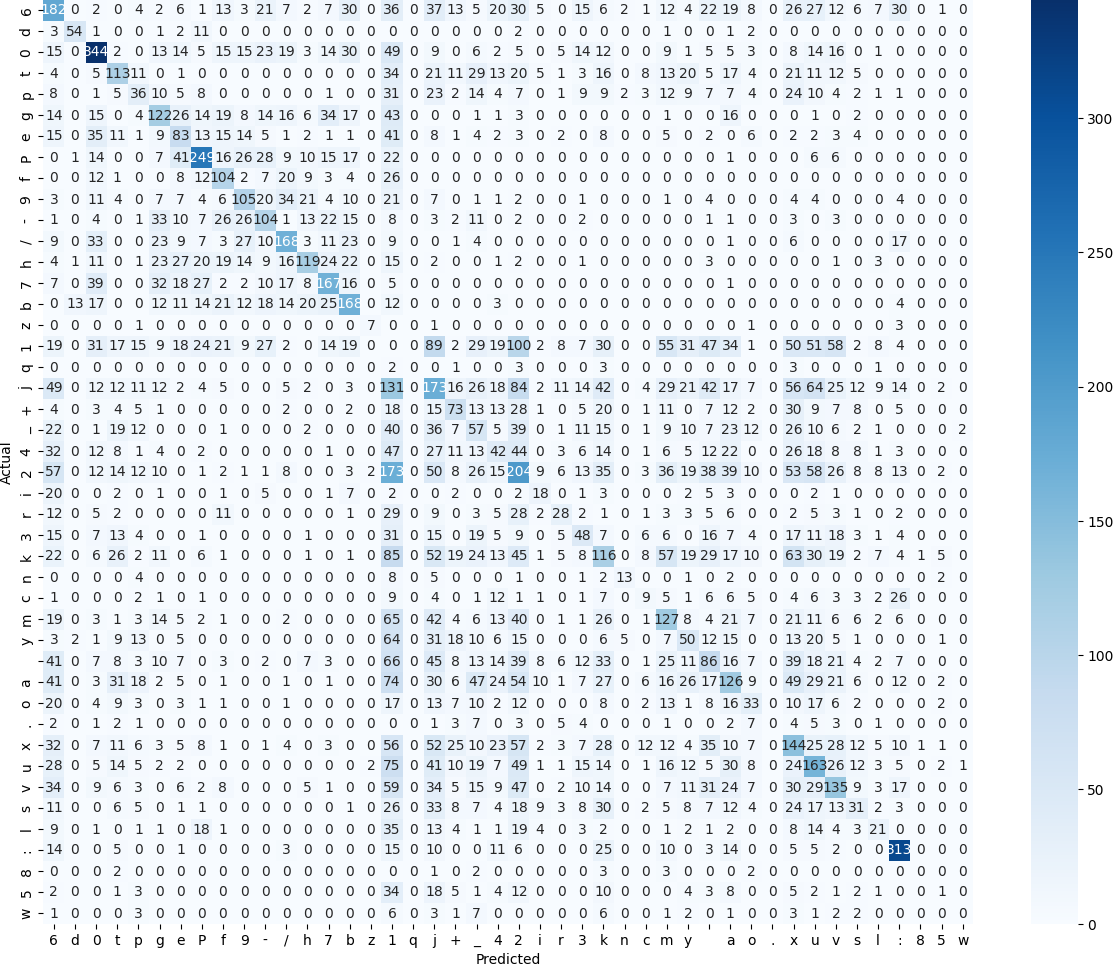

In [53]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create a confusion matrix and visualize it
confusion = confusion_matrix(char_list_target, char_list_predictions)


# Get unique labels from the char lists
unique_labels = list(set(char_list_target + char_list_predictions))

plt.figure(figsize=(15, 12))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Here is the complete confusion table where we broke down the sentences into letters in order to be able to see the results of the model classification.  
In any confusion matrix, and in this particular one, the Y-axis is the actual label from the DATA, while the Y-axis is the label to which it was classified.  
The entire middle diagonal is the number of successes of the model. For every real letter X that has indeed been classified as that letter X.  
The color of the cube is getting darker as there are many examples that have been classified as the Spicy letter.   There are numbers for the amount of letters that were originally X and classified as Y.  
It can be seen that indeed the classification results are not the most accurate, although there is a very large amount of letters on the upper diagonal - that is, an accurate classification. But unlike the model with the clustering, here there are a lot of letters that were misclassified, all the cubes in the middle of the matrix.  
If we look at the higher numbers among them, like 100 classifications whose original letter is: '1' but were classified as '2'. We would like to examine why the model was wrong in so many examples. If we look, we see that there are 173 classifications where the original letter is '2' and was classified as '1', it seems that the model got really confused between the semper marking '1' and the number marking '2'. If we look at the drawing where each letter is marked, it seems that indeed the markings are relatively similar. It can therefore be said that the model gets confused and is wrong precisely where there is a similarity between the signs, especially since all the signs represent hands, it will be difficult to differentiate between the images, as long as the relationship between the coordinate points is the same, it is considered the same letter, but since it is dynamic and different, it will be very difficult to be very precise in the letters similar What's more, as a thought for the future we would perhaps like to understand the transformer model more deeply and know what changes can be made in order to achieve better results.  

The initial model was so successful precisely because we separated the video into images and used a supervised learning algorithm with the help of clustering. We divided the number of classes according to the number of unique letters, so even when there are two very similar letters, they will be divided into two different classes, because that's how we defined the division. And we arrived at a new data base! containing thousands of images of outstretched hands with the letter they represent. In this way, the model can more easily identify the structure of the signal it is required to classify and succeed in doing so. As thoughts and improvements for the future, this seems like a very successful idea to improve and run on all the data, since its accuracy and correctness are very impressive. We believe that by doing this we will be able to reach an excellent model that will be able to take a video of hand signs with very high accuracy, split it into images, insert it into the model as an image image and thereby extract the classification of letters, by connecting identical groups of consecutive letters we will be able to arrive at the correct sentence that the deaf person wanted to indicate To us and to translate it into the English language!

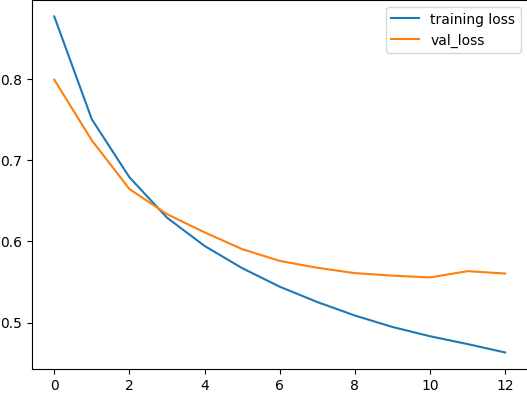

In [49]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training loss', 'val_loss'])

In [50]:
model.summary()

Model: "transformer"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 landmark_embedding (Landmar  (None, 16, 200)          1019200   
 kEmbedding)                                                     
                                                                 
 token_embedding (TokenEmbed  multiple                 25200     
 ding)                                                           
                                                                 
 sequential_2 (Sequential)   (None, 16, 200)           2627200   
                                                                 
 transformer_decoder (Transf  multiple                 1447000   
 ormerDecoder)                                                   
                                                                 
 dense_6 (Dense)             multiple                  12462     
                                                       

We can see in the graph the decrease in loss, i.e. the increase in accuracy throughout all the epochs, when in training there is always a relative increase in accuracy at each stage, compared to the test which in the beginning did improve each time but after the sixth epoch moderated and remained with a loss in the 0.55 area.
  
It can therefore be concluded that since most of the data was indeed use for training - 80% and only 20% to testing, the accuracy in training is higher and there is some overfitting for the training, but the difference between the accuracies is not high and we will not declare that the model causes overfitting.
  
Overall, we reached a pretty good result for a fairly complex task of extracting a text segment from a video segment, the accuracy here is more complex, since there are frames of transition between letters, and the number of frames per letter that changes each time.

# Summary
After a lot of work and labor we reached to very nice results.  
The two models we used were neural networks, which is natural when dealing with images.  
We can compare our basic model which gave higher accuracy than the transformer model, only that the basic model used the clustering model that we built in order to reach its accuracy results, while splitting the video segment into frames and  referring to the classification as a single frame, compared to the more complex model of the transformer in which we did treat the video as video and split it into source and target tensors, so that in fact we had a different problem to solve here of classifying a sequence from a sequence, which is more complex More errors will fall into it.  
The running time of the model in which we ran all the data was extremely long, and if we want to improve the model and add more ephoces, intermediate layers and perspertons to it, it will only get better and better, but since the running time is long, we refrained from improving it more and left it exactly as it is now.  
All in all, we went through the data, researched and understood it. We cleaned and arranged everything needed to train neural network models, we arrived at very organized information and ran it on the models, produced the results of the models and their accuracy. And we are very satisfied with the work that was our share and the beautiful results we received.